<a href="https://colab.research.google.com/github/amiryarahmadi/M31/blob/main/M31_BvsSFR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


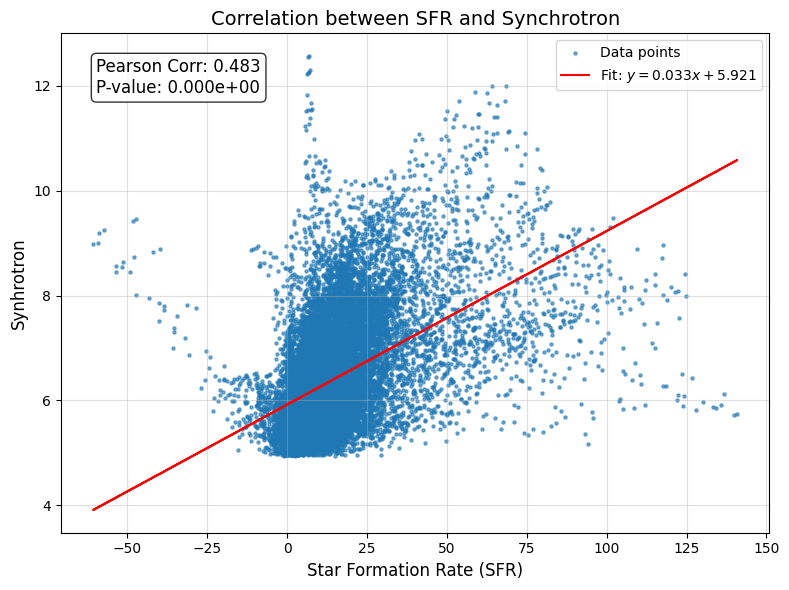

In [ ]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Load the magnetic field map
synch = "/content/drive/MyDrive/M31_BvsSFR/M31_B.fits"
with fits.open(synch) as hdul1:
    synch_data = hdul1[0].data

# Load the SFR map
sfr_file = "/content/drive/MyDrive/M31_BvsSFR/M31_halpha.fits"
with fits.open(sfr_file) as hdul2:
    sfr_data = hdul2[0].data

# Flatten the maps and mask NaN or invalid data
synch_flat = synch_data.flatten()
sfr_flat = sfr_data.flatten()

# Create a mask for valid data points
valid_mask = np.isfinite(synch_flat) & np.isfinite(sfr_flat)

# Apply the mask
synch_valid = synch_flat[valid_mask]
sfr_valid = sfr_flat[valid_mask]

# Calculate Pearson correlation
pearson_corr, pearson_p = pearsonr(sfr_valid, synch_valid)

# Fit a linear regression model
sfr_valid_reshaped = sfr_valid.reshape(-1, 1)  # Reshape for sklearn
reg_model = LinearRegression().fit(sfr_valid_reshaped, synch_valid)
slope = reg_model.coef_[0]
intercept = reg_model.intercept_
line_fit = reg_model.predict(sfr_valid_reshaped)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(sfr_valid, synch_valid, s=5, alpha=0.6, label="Data points")
plt.plot(sfr_valid, line_fit, color="red", label=f"Fit: $y = {slope:.3f}x + {intercept:.3f}$")

# Add correlation information in a box
textstr = f"Pearson Corr: {pearson_corr:.3f}\nP-value: {pearson_p:.3e}"
props = dict(boxstyle="round", facecolor="white", alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment="top", bbox=props)

# Customize plot
plt.title("Correlation between SFR and Synchrotron", fontsize=14)
plt.xlabel("Star Formation Rate (SFR)", fontsize=12)
plt.ylabel("Synhrotron", fontsize=12)
plt.grid(alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


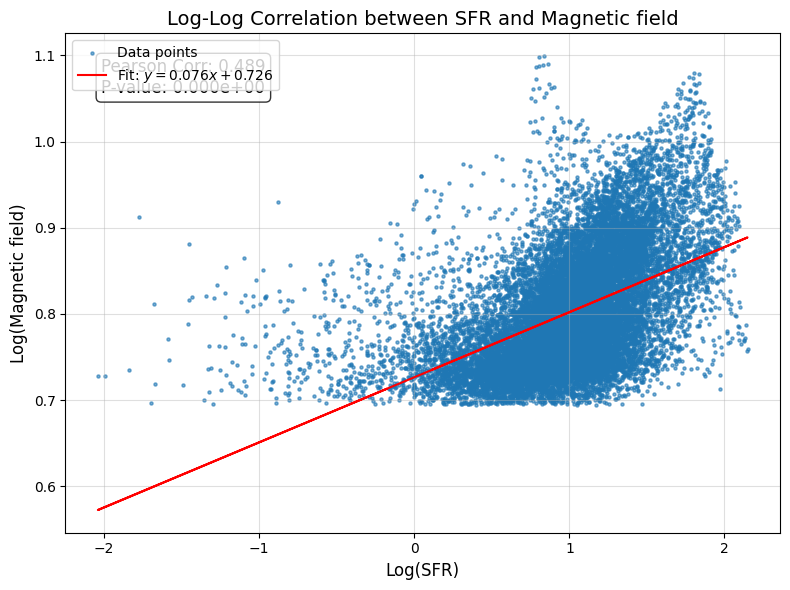

In [ ]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Load the magnetic field map
synch = "/content/drive/MyDrive/M31_BvsSFR/M31_B.fits"
with fits.open(synch) as hdul1:
    synch_data = hdul1[0].data

# Load the SFR map
sfr_file = "/content/drive/MyDrive/M31_BvsSFR/M31_halpha.fits"
with fits.open(sfr_file) as hdul2:
    sfr_data = hdul2[0].data

# Flatten the maps and mask NaN or invalid data
synch_flat = synch_data.flatten()
sfr_flat = sfr_data.flatten()

# Create a mask for valid and positive data points
valid_mask = np.isfinite(synch_flat) & np.isfinite(sfr_flat) & (synch_flat > 0) & (sfr_flat > 0)

# Apply the mask
synch_valid = synch_flat[valid_mask]
sfr_valid = sfr_flat[valid_mask]

# Calculate the logarithm of the data
log_synch = np.log10(synch_valid)
log_sfr = np.log10(sfr_valid)

# Calculate Pearson correlation in log-log space
pearson_corr, pearson_p = pearsonr(log_sfr, log_synch)

# Fit a linear regression model in log-log space
log_sfr_reshaped = log_sfr.reshape(-1, 1)  # Reshape for sklearn
reg_model = LinearRegression().fit(log_sfr_reshaped, log_synch)
slope = reg_model.coef_[0]
intercept = reg_model.intercept_
line_fit = reg_model.predict(log_sfr_reshaped)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(log_sfr, log_synch, s=5, alpha=0.6, label="Data points")
plt.plot(log_sfr, line_fit, color="red", label=f"Fit: $y = {slope:.3f}x + {intercept:.3f}$")

# Add correlation information in a box
textstr = f"Pearson Corr: {pearson_corr:.3f}\nP-value: {pearson_p:.3e}"
props = dict(boxstyle="round", facecolor="white", alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment="top", bbox=props)

# Customize plot
plt.title("Log-Log Correlation between SFR and Magnetic field", fontsize=14)
plt.xlabel("Log(SFR)", fontsize=12)
plt.ylabel("Log(Magnetic field)", fontsize=12)
plt.grid(alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


Shape of the squeezed magnetic field map: (155, 441)


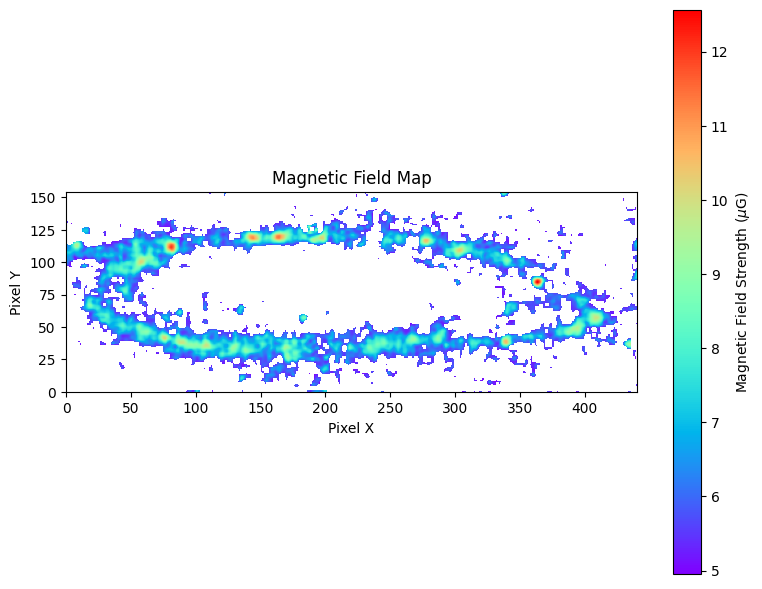

In [ ]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

# Load the magnetic field map
magnetic_field_file = "/content/drive/MyDrive/M31_BvsSFR/M31_B.fits"
with fits.open(magnetic_field_file) as hdul:
    magnetic_field_data = hdul[0].data

# Squeeze the data to remove singleton dimensions
squeezed_data = np.squeeze(magnetic_field_data)

# Check the shape of the squeezed data
print("Shape of the squeezed magnetic field map:", squeezed_data.shape)

# Plot the squeezed magnetic field map
plt.figure(figsize=(8, 6))
plt.imshow(squeezed_data, origin="lower", cmap="rainbow")
plt.colorbar(label="Magnetic Field Strength ($\mu$G)")
plt.title("Magnetic Field Map")
plt.xlabel("Pixel X")
plt.ylabel("Pixel Y")
plt.tight_layout()
plt.show()



#Log-Log correlation between B and SFR

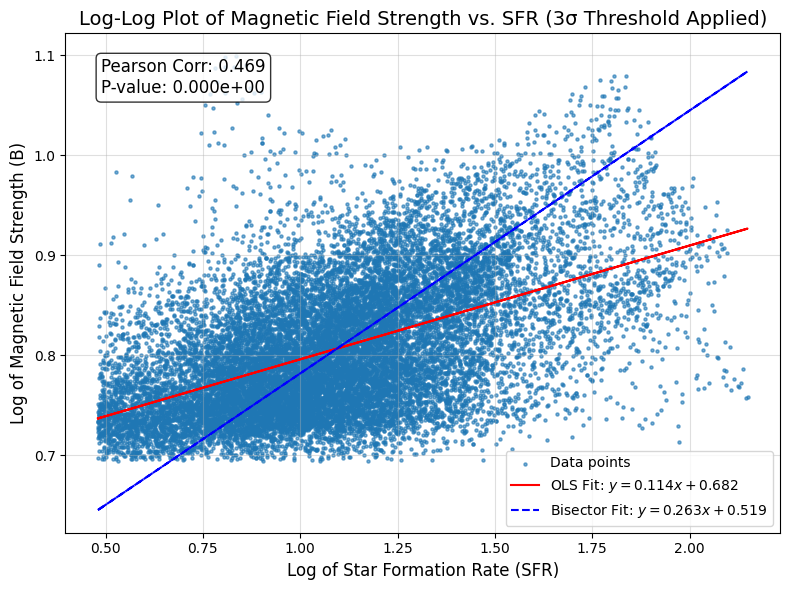

In [ ]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Load the magnetic field map
magnetic_field_file = "/content/drive/MyDrive/M31_BvsSFR/M31_B.fits"
with fits.open(magnetic_field_file) as hdul1:
    magnetic_field_data = np.squeeze(hdul1[0].data)

# Load the SFR map
sfr_file = "/content/drive/MyDrive/M31_BvsSFR/M31_halpha.fits"
with fits.open(sfr_file) as hdul2:
    sfr_data = np.squeeze(hdul2[0].data)

# Apply 3σ threshold to the SFR map
rms_noise_sfr = 1.0065
threshold = 3 * rms_noise_sfr
sfr_data[sfr_data < threshold] = np.nan

# Flatten the maps and mask NaN or invalid data
magnetic_field_flat = magnetic_field_data.flatten()
sfr_flat = sfr_data.flatten()
valid_mask = np.isfinite(magnetic_field_flat) & np.isfinite(sfr_flat)
magnetic_field_valid = magnetic_field_flat[valid_mask]
sfr_valid = sfr_flat[valid_mask]

# Calculate Pearson correlation
pearson_corr, pearson_p = pearsonr(sfr_valid, magnetic_field_valid)

# Fit a linear regression model for the bisector line
# Ordinary least squares for B vs. SFR
reg_B_vs_SFR = LinearRegression().fit(np.log10(sfr_valid.reshape(-1, 1)), np.log10(magnetic_field_valid))
slope_B_vs_SFR = reg_B_vs_SFR.coef_[0]
intercept_B_vs_SFR = reg_B_vs_SFR.intercept_

# Ordinary least squares for SFR vs. B
reg_SFR_vs_B = LinearRegression().fit(np.log10(magnetic_field_valid.reshape(-1, 1)), np.log10(sfr_valid))
slope_SFR_vs_B = reg_SFR_vs_B.coef_[0]
intercept_SFR_vs_B = reg_SFR_vs_B.intercept_

# Calculate the bisector line parameters
bisector_slope = (slope_B_vs_SFR + 1 / slope_SFR_vs_B) / 2
bisector_intercept = (intercept_B_vs_SFR + (-intercept_SFR_vs_B / slope_SFR_vs_B)) / 2

# Generate bisector fit values in log scale
bisector_fit = bisector_slope * np.log10(sfr_valid) + bisector_intercept

# Plotting in log-log scale
plt.figure(figsize=(8, 6))
plt.scatter(np.log10(sfr_valid), np.log10(magnetic_field_valid), s=5, alpha=0.6, label="Data points")
plt.plot(np.log10(sfr_valid), slope_B_vs_SFR * np.log10(sfr_valid) + intercept_B_vs_SFR, color="red",
         label="OLS Fit: $y = {:.3f}x + {:.3f}$".format(slope_B_vs_SFR, intercept_B_vs_SFR))
plt.plot(np.log10(sfr_valid), bisector_fit, color="blue", linestyle="--",
         label="Bisector Fit: $y = {:.3f}x + {:.3f}$".format(bisector_slope, bisector_intercept))

# Add correlation information in a box
textstr = f"Pearson Corr: {pearson_corr:.3f}\nP-value: {pearson_p:.3e}"
props = dict(boxstyle="round", facecolor="white", alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment="top", bbox=props)

# Customize plot
plt.title("Log-Log Plot of Magnetic Field Strength vs. SFR (3σ Threshold Applied)", fontsize=14)
plt.xlabel("Log of Star Formation Rate (SFR)", fontsize=12)
plt.ylabel("Log of Magnetic Field Strength (B)", fontsize=12)
plt.grid(alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


#Correlation between B and CO Gas

Pearson Correlation: 0.5159874916177544, P-value: 0.0


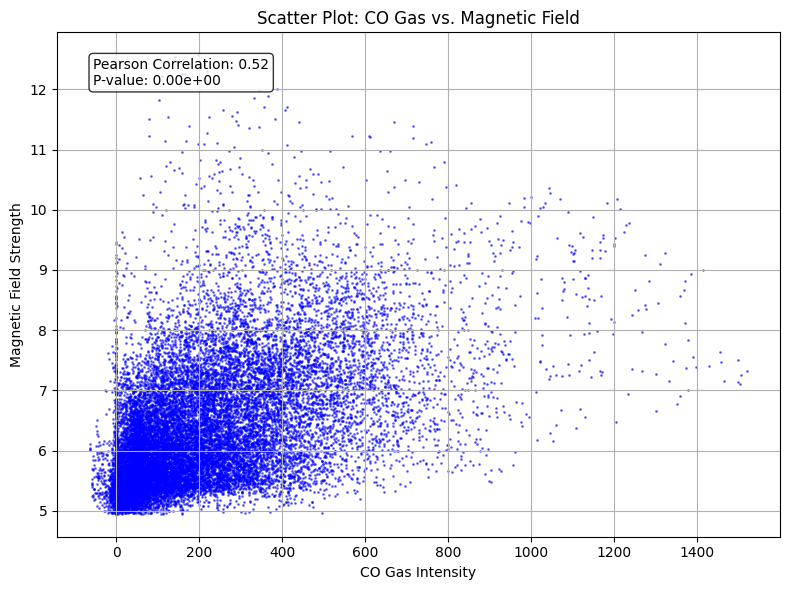

In [ ]:
import numpy as np
from astropy.io import fits
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
# Load magnetic field map
magnetic_field_data = fits.getdata('/content/drive/MyDrive/M31_BvsSFR/M31_B.fits')

# Load CO gas map
co_gas_data = fits.getdata('/content/drive/MyDrive/M31_BvsSFR/m31_co90.fits')

# Flatten and mask invalid data
mag_field_flat = magnetic_field_data.flatten()
co_gas_flat = co_gas_data.flatten()

# Mask NaN or invalid values
mask = ~np.isnan(mag_field_flat) & ~np.isnan(co_gas_flat)
mag_field_clean = mag_field_flat[mask]
co_gas_clean = co_gas_flat[mask]

# Calculate Pearson correlation
corr, p_value = pearsonr(mag_field_clean, co_gas_clean)
print(f"Pearson Correlation: {corr}, P-value: {p_value}")

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(co_gas_clean, mag_field_clean, s=1, alpha=0.5, color='blue')
plt.xlabel('CO Gas Intensity')
plt.ylabel('Magnetic Field Strength')
plt.title('Scatter Plot: CO Gas vs. Magnetic Field')

# Add a text box with the correlation coefficient
textstr = f"Pearson Correlation: {corr:.2f}\nP-value: {p_value:.2e}"
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from astropy.io import fits

header = fits.getheader('/content/drive/MyDrive/M31_BvsSFR/m31gas45.eff1b.small.fits')
print(header['BUNIT'])  # Displays the units


10^18 at


#B vs CO


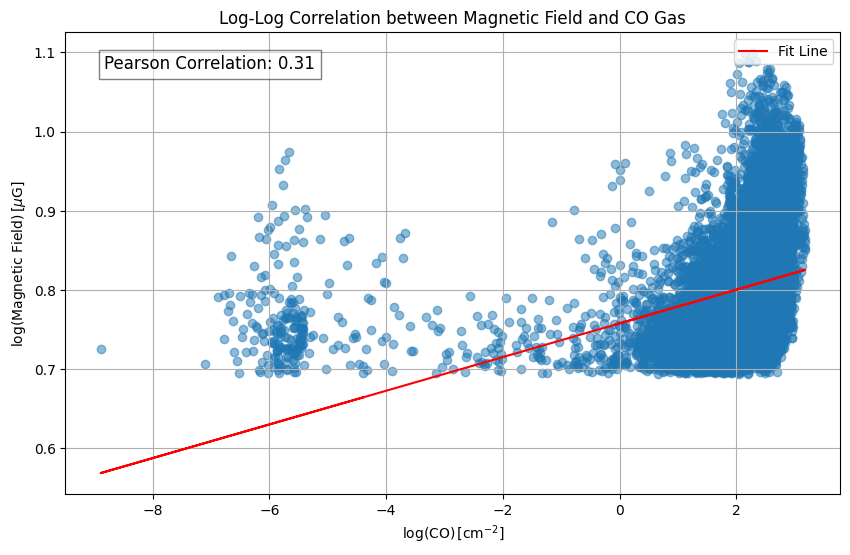

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from astropy.io import fits

# Load the FITS files
magnetic_field_data = fits.getdata('/content/drive/MyDrive/M31_BvsSFR/M31_B.fits')
co_data = fits.getdata('/content/drive/MyDrive/M31_BvsSFR/m31_co90.fits')

# Flatten the data if they are 2D images
magnetic_field = magnetic_field_data.flatten()
co = co_data.flatten()

# Filter out non-finite values (NaNs and Infs) and exclude zeros or negative values for log transformation
mask = np.isfinite(magnetic_field) & np.isfinite(co) & (magnetic_field > 0) & (co > 0)
magnetic_field_filtered = magnetic_field[mask]
co_filtered = co[mask]

# Apply logarithmic transformation
log_magnetic_field = np.log10(magnetic_field_filtered)
log_co = np.log10(co_filtered)

# Calculate Pearson correlation coefficient for log-transformed data
corr_coefficient, _ = pearsonr(log_magnetic_field, log_co)

# Create the log-log plot
plt.figure(figsize=(10, 6))
plt.scatter(log_co, log_magnetic_field, alpha=0.5)
plt.title('Log-Log Correlation between Magnetic Field and CO Gas')
plt.xlabel(r'$\log(\text{CO}) \, [\text{cm}^{-2}]$')
plt.ylabel(r'$\log(\text{Magnetic Field}) \, [\mu \text{G}]$')

# Fit a line to the log-transformed data
fit = np.polyfit(log_co, log_magnetic_field, 1)
fit_line = np.polyval(fit, log_co)
plt.plot(log_co, fit_line, color='red', label='Fit Line')

# Display Pearson correlation coefficient on the top-left
plt.text(0.05, 0.95, f'Pearson Correlation: {corr_coefficient:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.5), verticalalignment='top')

# Add a legend for the fit line
plt.legend(loc='upper right')

# Show grid
plt.grid()

# Display the plot
plt.show()






#B vs Gas(log-log)

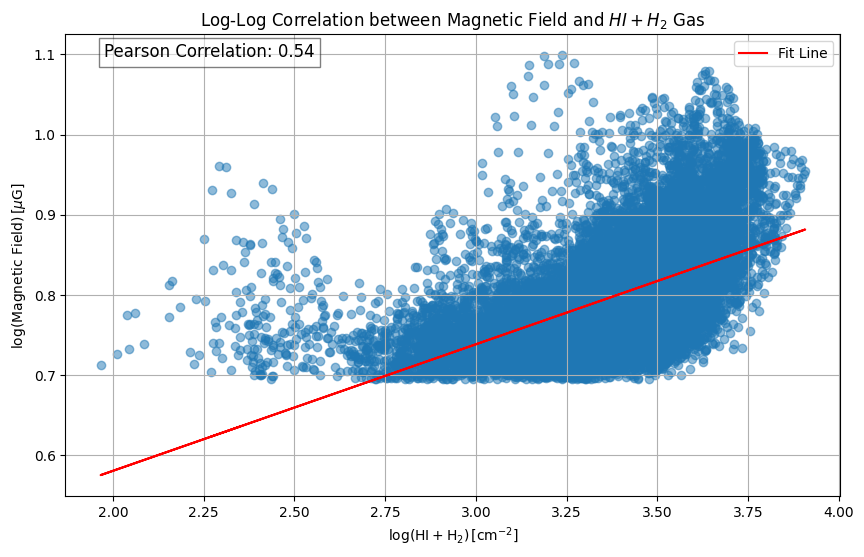

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from astropy.io import fits

# Load the FITS files
magnetic_field_data = fits.getdata('/content/drive/MyDrive/M31_BvsSFR/M31_B.fits')
co_data = fits.getdata('/content/drive/MyDrive/M31_BvsSFR/m31_gas90.fits')

# Flatten the data if they are 2D images
magnetic_field = magnetic_field_data.flatten()
co = co_data.flatten()

# Filter out non-finite values (NaNs and Infs)
mask = np.isfinite(magnetic_field) & np.isfinite(co) & (magnetic_field > 0) & (co > 0)
magnetic_field_filtered = magnetic_field[mask]
co_filtered = co[mask]

# Apply logarithmic transformation
log_magnetic_field = np.log10(magnetic_field_filtered)
log_co = np.log10(co_filtered)

# Calculate Pearson correlation coefficient
corr_coefficient, _ = pearsonr(log_magnetic_field, log_co)

# Create the log-log plot
plt.figure(figsize=(10, 6))
plt.scatter(log_co, log_magnetic_field, alpha=0.5)
plt.title('Log-Log Correlation between Magnetic Field and $HI + H_2$ Gas')
plt.xlabel(r'$\log(\text{HI} + \text{H}_2) \, [\text{cm}^{-2}]$')
plt.ylabel(r'$\log(\text{Magnetic Field}) \, [\mu \text{G}]$')

# Fit a line to the log-transformed data
fit = np.polyfit(log_co, log_magnetic_field, 1)
fit_line = np.polyval(fit, log_co)
plt.plot(log_co, fit_line, color='red', label='Fit Line')

# Display Pearson correlation coefficient in a box
plt.text(0.05, 0.95, f'Pearson Correlation: {corr_coefficient:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.5))

# Add legend and grid
plt.legend()
plt.grid()
plt.show()


B vs HI

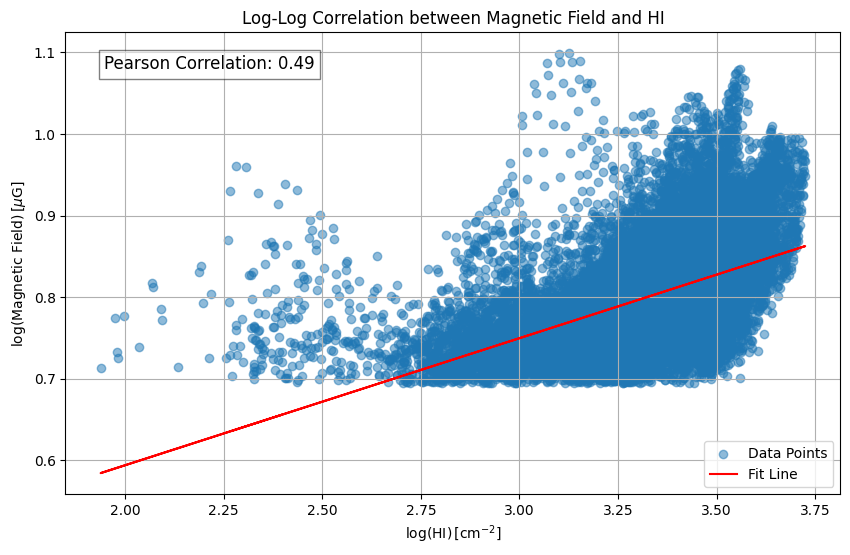

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from astropy.io import fits

# Load the FITS files
magnetic_field_data = fits.getdata('/content/drive/MyDrive/M31_BvsSFR/M31_B.fits')
hi_data = fits.getdata('/content/drive/MyDrive/M31_BvsSFR/m31_HI90.fits')

# Flatten the data if they are 2D images
magnetic_field = magnetic_field_data.flatten()
hi = hi_data.flatten()

# Filter out non-finite values (NaNs and Infs) and exclude zeros or negative values for log transformation
mask = np.isfinite(magnetic_field) & np.isfinite(hi) & (magnetic_field > 0) & (hi > 0)
magnetic_field_filtered = magnetic_field[mask]
hi_filtered = hi[mask]

# Apply logarithmic transformation
log_magnetic_field = np.log10(magnetic_field_filtered)
log_hi = np.log10(hi_filtered)

# Calculate Pearson correlation coefficient for log-transformed data
corr_coefficient, _ = pearsonr(log_magnetic_field, log_hi)

# Create the log-log plot
plt.figure(figsize=(10, 6))
plt.scatter(log_hi, log_magnetic_field, alpha=0.5, label='Data Points')
plt.title('Log-Log Correlation between Magnetic Field and HI')
plt.xlabel(r'$\log(\text{HI}) \, [\text{cm}^{-2}]$')  # Corrected unit for HI data
plt.ylabel(r'$\log(\text{Magnetic Field}) \, [\mu \text{G}]$')  # Corrected unit for magnetic field

# Fit a line to the log-transformed data
fit = np.polyfit(log_hi, log_magnetic_field, 1)
fit_line = np.polyval(fit, log_hi)
plt.plot(log_hi, fit_line, color='red', label='Fit Line')

# Display Pearson correlation coefficient on the top-left
plt.text(0.05, 0.95, f'Pearson Correlation: {corr_coefficient:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.5), verticalalignment='top')

# Add a legend and grid
plt.legend(loc='lower right')
plt.grid()

# Show the plot
plt.show()



#SFR vs CO

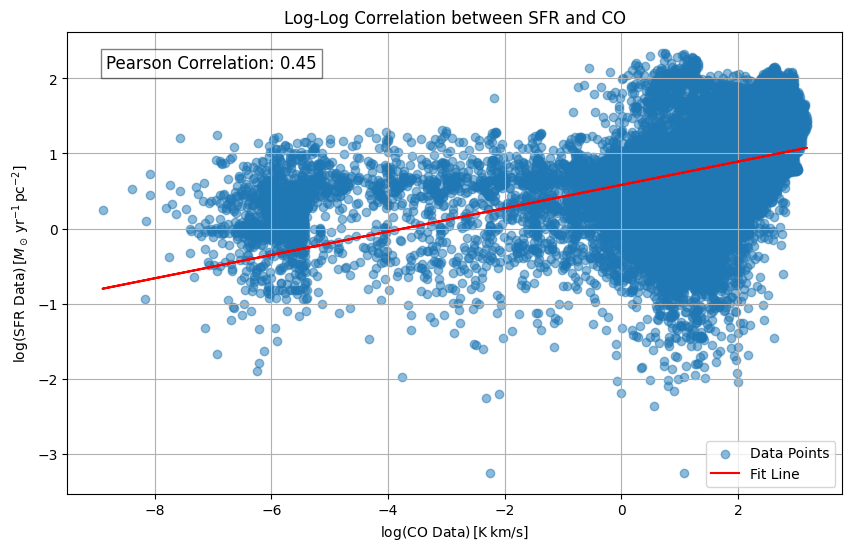

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from astropy.io import fits

# Load the FITS files
sfr_data = fits.getdata('/content/drive/MyDrive/M31_BvsSFR/M31_halpha.fits')
co_data = fits.getdata('/content/drive/MyDrive/M31_BvsSFR/m31_co90.fits')

# Flatten the data if they are 2D images
sfr = sfr_data.flatten()  # SFR units: \( M_\odot \, \text{yr}^{-1} \, \text{pc}^{-2} \)
co = co_data.flatten()    # CO units: \( \text{K} \, \text{km/s} \)

# Filter out non-finite values (NaNs and Infs) and exclude zeros or negative values for log transformation
mask = np.isfinite(sfr) & np.isfinite(co) & (sfr > 0) & (co > 0)
sfr_filtered = sfr[mask]
co_filtered = co[mask]

# Apply logarithmic transformation
log_sfr = np.log10(sfr_filtered)
log_co = np.log10(co_filtered)

# Calculate Pearson correlation coefficient for log-transformed data
corr_coefficient, _ = pearsonr(log_sfr, log_co)

# Create the log-log plot
plt.figure(figsize=(10, 6))
plt.scatter(log_co, log_sfr, alpha=0.5, label='Data Points')
plt.title('Log-Log Correlation between SFR and CO')
plt.xlabel(r'$\log(\text{CO Data}) \, [\text{K} \, \text{km/s}]$')
plt.ylabel(r'$\log(\text{SFR Data}) \, [M_\odot \, \text{yr}^{-1} \, \text{pc}^{-2}]$')

# Fit a line to the log-transformed data
fit = np.polyfit(log_co, log_sfr, 1)
fit_line = np.polyval(fit, log_co)
plt.plot(log_co, fit_line, color='red', label='Fit Line')

# Display Pearson correlation coefficient on the top-left
plt.text(0.05, 0.95, f'Pearson Correlation: {corr_coefficient:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.5), verticalalignment='top')

# Add a legend
plt.legend(loc='lower right')

plt.grid()
plt.show()


In [ ]:
print(co_data.shape)


(1, 155, 441)


In [ ]:
from astropy.io import fits
import numpy as np


# Path to the FITS file
file1 = '/content/drive/MyDrive/M31_BvsSFR/m31_co90.fits'

# Read the FITS file
with fits.open(file1) as hdul:
    data = hdul[0].data  # Access the primary data
    header = hdul[0].header  # Access the header

# Check the shape of the data
print("Data shape:", data.shape)

# Handle multidimensional data
if data.ndim == 2:  # 2D data
    data_2d = data
elif data.ndim > 2:  # 3D or 4D data
    data_2d = data[:, :, 0]  # Extract the first channel or plane
else:
    raise ValueError("Unexpected data dimensions: {}".format(data.shape))

# Image dimensions
naxis1, naxis2 = data_2d.shape

# Create output array
newfile = np.zeros((naxis1, naxis2))

# Parameters (replace ? with actual values)
x_c =226   # X center pixel
y_c =77   # Y center pixel
i = 75  # Inclination in degrees
p = 0.05  # Pixel size in arcseconds or kpc
radius = 5  # Radius in the same units as pixel size

# Perform the radial subtraction
for i in range(naxis1-1):
    for j in range(naxis2-1):
        r = np.sqrt((i - x_c) ** 2 + (1. / np.cos(np.radians(i)) * (j - y_c)) ** 2) * p
        sa = data_2d[i, j]

        if r <= radius:
            x = 0.0  # Subtract the region within the radius
        else:
            x = sa  # Keep the original value outside the radius

        newfile[i, j] = x

# Write the output FITS file
fits.writeto('/content/drive/MyDrive/M31_BvsSFR/m31_co90_rescale.fits', newfile, header, overwrite=True)
print("Output written to '/content/drive/MyDrive/M31_BvsSFR/m31_co90_rescale.fits'")



Data shape: (1, 155, 441)
Output written to '/content/drive/MyDrive/M31_BvsSFR/m31_co90_rescale.fits'


#B vs Gas

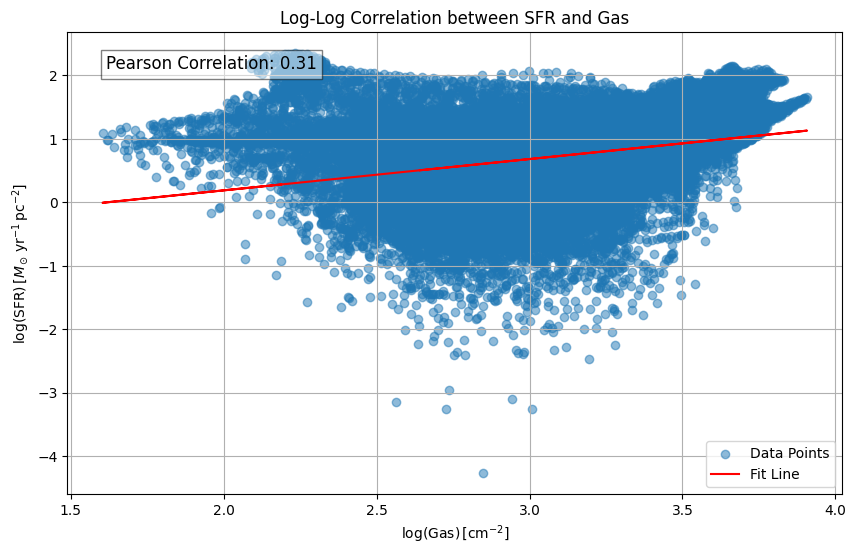

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from astropy.io import fits

# Load the FITS files
sfr_data = fits.getdata('/content/drive/MyDrive/M31_BvsSFR/M31_halpha.fits')
gas_data = fits.getdata('/content/drive/MyDrive/M31_BvsSFR/m31_gas90.fits')  # The gas map (HI + H2)

# Flatten the data if they are 2D images
sfr = sfr_data.flatten()  # SFR units: \( M_\odot \, \text{yr}^{-1} \, \text{pc}^{-2} \)
gas = gas_data.flatten()  # Gas units: \( \text{cm}^{-2} \)

# Filter out non-finite values (NaNs and Infs) and exclude zeros or negative values for log transformation
mask = np.isfinite(sfr) & np.isfinite(gas) & (sfr > 0) & (gas > 0)
sfr_filtered = sfr[mask]
gas_filtered = gas[mask]

# Apply logarithmic transformation
log_sfr = np.log10(sfr_filtered)
log_gas = np.log10(gas_filtered)

# Calculate Pearson correlation coefficient for log-transformed data
corr_coefficient, _ = pearsonr(log_sfr, log_gas)

# Create the log-log plot
plt.figure(figsize=(10, 6))
plt.scatter(log_gas, log_sfr, alpha=0.5, label='Data Points')
plt.title('Log-Log Correlation between SFR and Gas')
plt.xlabel(r'$\log(\text{Gas}) \, [\text{cm}^{-2}]$')
plt.ylabel(r'$\log(\text{SFR}) \, [M_\odot \, \text{yr}^{-1} \, \text{pc}^{-2}]$')

# Fit a line to the log-transformed data
fit = np.polyfit(log_gas, log_sfr, 1)
fit_line = np.polyval(fit, log_gas)
plt.plot(log_gas, fit_line, color='red', label='Fit Line')

# Display Pearson correlation coefficient in the top-left
plt.text(0.05, 0.95, f'Pearson Correlation: {corr_coefficient:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.5), verticalalignment='top')

# Add a legend
plt.legend(loc='lower right')

# Show grid
plt.grid()

# Display the plot
plt.show()


#B vs HI

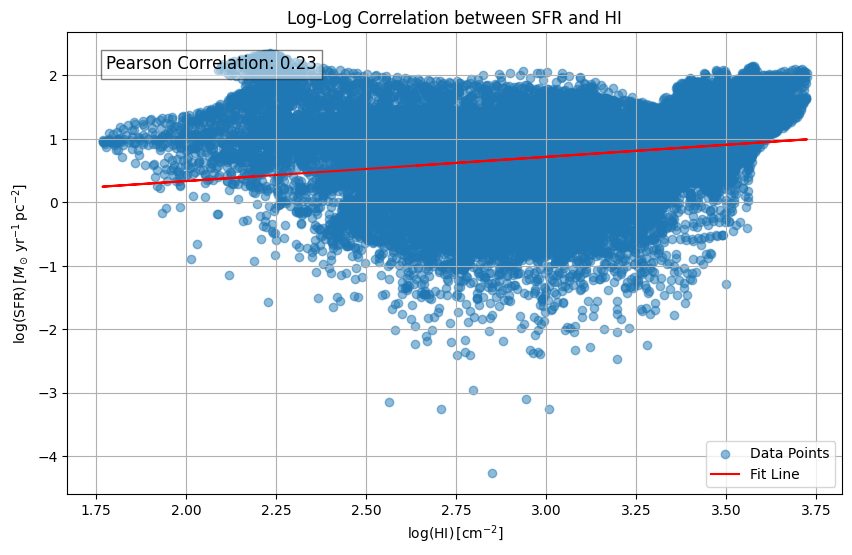

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from astropy.io import fits

# Load the FITS files
sfr_data = fits.getdata('/content/drive/MyDrive/M31_BvsSFR/M31_halpha.fits')
hi_data = fits.getdata('/content/drive/MyDrive/M31_BvsSFR/m31_HI90.fits')  # HI map

# Flatten the data if they are 2D images
sfr = sfr_data.flatten()  # SFR units: \( M_\odot \, \text{yr}^{-1} \, \text{pc}^{-2} \)
hi = hi_data.flatten()    # HI units: \( \text{cm}^{-2} \)

# Filter out non-finite values (NaNs and Infs) and exclude zeros or negative values for log transformation
mask = np.isfinite(sfr) & np.isfinite(hi) & (sfr > 0) & (hi > 0)
sfr_filtered = sfr[mask]
hi_filtered = hi[mask]

# Apply logarithmic transformation
log_sfr = np.log10(sfr_filtered)
log_hi = np.log10(hi_filtered)

# Calculate Pearson correlation coefficient for log-transformed data
corr_coefficient, _ = pearsonr(log_sfr, log_hi)

# Create the log-log plot
plt.figure(figsize=(10, 6))
plt.scatter(log_hi, log_sfr, alpha=0.5, label='Data Points')
plt.title('Log-Log Correlation between SFR and HI')
plt.xlabel(r'$\log(\text{HI}) \, [\text{cm}^{-2}]$')
plt.ylabel(r'$\log(\text{SFR}) \, [M_\odot \, \text{yr}^{-1} \, \text{pc}^{-2}]$')

# Fit a line to the log-transformed data
fit = np.polyfit(log_hi, log_sfr, 1)
fit_line = np.polyval(fit, log_hi)
plt.plot(log_hi, fit_line, color='red', label='Fit Line')

# Display Pearson correlation coefficient in the top-left
plt.text(0.05, 0.95, f'Pearson Correlation: {corr_coefficient:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.5), verticalalignment='top')

# Add a legend
plt.legend(loc='lower right')

# Show grid
plt.grid()

# Display the plot
plt.show()


In [ ]:
squeezed_data = np.squeeze(file1)
plt.imshow(squeezed_data)

TypeError: imshow() missing 1 required positional argument: 'X'

In [ ]:
15*(1/3600)*(1/57.7)*780

0.05632582322357019

0.4171769459788842


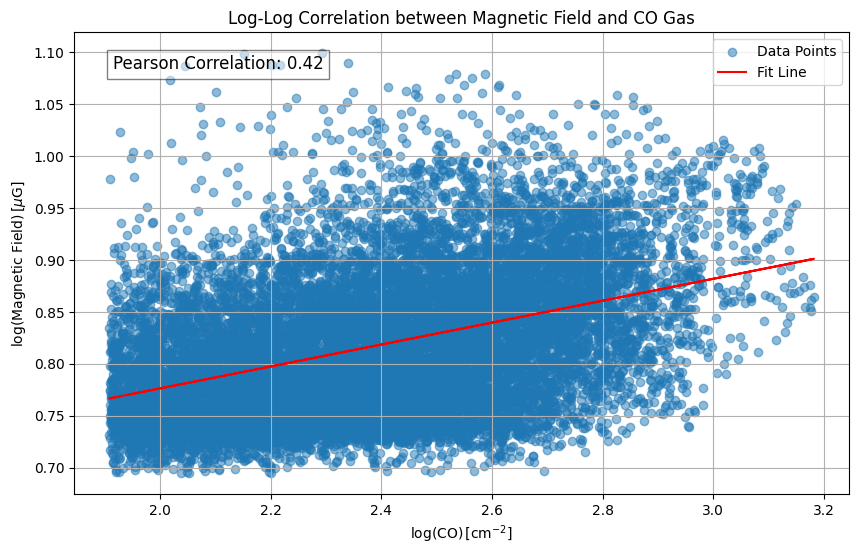

In [ ]:
aimport numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from astropy.io import fits

# Load the FITS files
magnetic_field_data = fits.getdata('/content/drive/MyDrive/M31_BvsSFR/M31_B.fits')
co_data = fits.getdata('/content/drive/MyDrive/M31_BvsSFR/m31_co90.fits')

# Flatten the data if they are 2D images
magnetic_field = magnetic_field_data.flatten()
co = co_data.flatten()

# Define the RMS noise and calculate the 3σ threshold
rms_co = 27  # RMS noise in cm^-2
three_sigma = 3 * rms_co

# Filter out non-finite values (NaNs and Infs) and apply the 3σ threshold
mask = (
    np.isfinite(magnetic_field) &
    np.isfinite(co) &
    (magnetic_field > 0) &
    (co > three_sigma)
)
magnetic_field_filtered = magnetic_field[mask]
co_filtered = co[mask]

# Apply logarithmic transformation
log_magnetic_field = np.log10(magnetic_field_filtered)
log_co = np.log10(co_filtered)

# Calculate Pearson correlation coefficient for log-transformed data
corr_coefficient, _ = pearsonr(log_magnetic_field, log_co)
print(corr_coefficient)
# Create the log-log plot
plt.figure(figsize=(10, 6))
plt.scatter(log_co, log_magnetic_field, alpha=0.5, label='Data Points')
plt.title('Log-Log Correlation between Magnetic Field and CO Gas')
plt.xlabel(r'$\log(\text{CO}) \, [\text{cm}^{-2}]$')
plt.ylabel(r'$\log(\text{Magnetic Field}) \, [\mu \text{G}]$')

# Fit a line to the log-transformed data
fit = np.polyfit(log_co, log_magnetic_field, 1)
fit_line = np.polyval(fit, log_co)
plt.plot(log_co, fit_line, color='red', label='Fit Line')

# Display Pearson correlation coefficient on the top-left
plt.text(0.05, 0.95, f'Pearson Correlation: {corr_coefficient:.2f}',
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.5), verticalalignment='top')

# Add a legend for the fit line
plt.legend(loc='upper right')

# Show grid
plt.grid()

# Display the plot
plt.show()


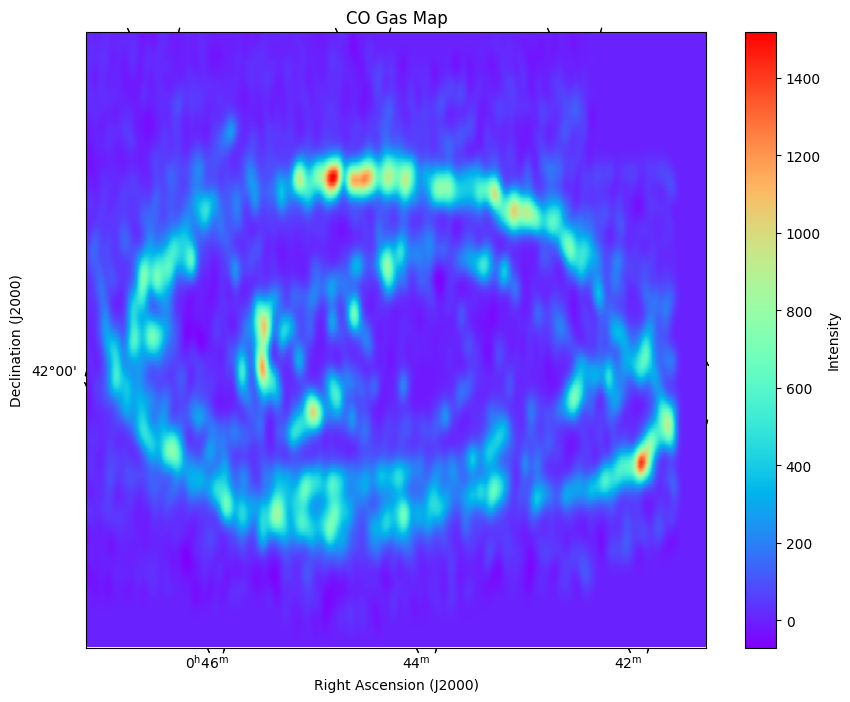

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

# Load the FITS file
co_gas = '/content/drive/MyDrive/M31_BvsSFR/m31_co90.fits'
hdu_co = fits.open(co_gas)
data_co = hdu_co[0].data
header_co = hdu_co[0].header

# Initialize WCS
wcs_co = WCS(header_co)

# Handle 3D data (e.g., take a slice along the velocity axis)
if data_co.ndim == 3:
    data_co = data_co[0]  # Select the first slice for visualization
    wcs_co = wcs_co.slice([0])  # Slice WCS to match the data slice

# Plot the CO map with WCS
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection=wcs_co)

im = ax.imshow(data_co, origin='lower', cmap='rainbow', aspect='auto')
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Intensity')

# Set axis labels using WCS
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')

# Add a title
plt.title('CO Gas Map')

# Show the plot
plt.show()


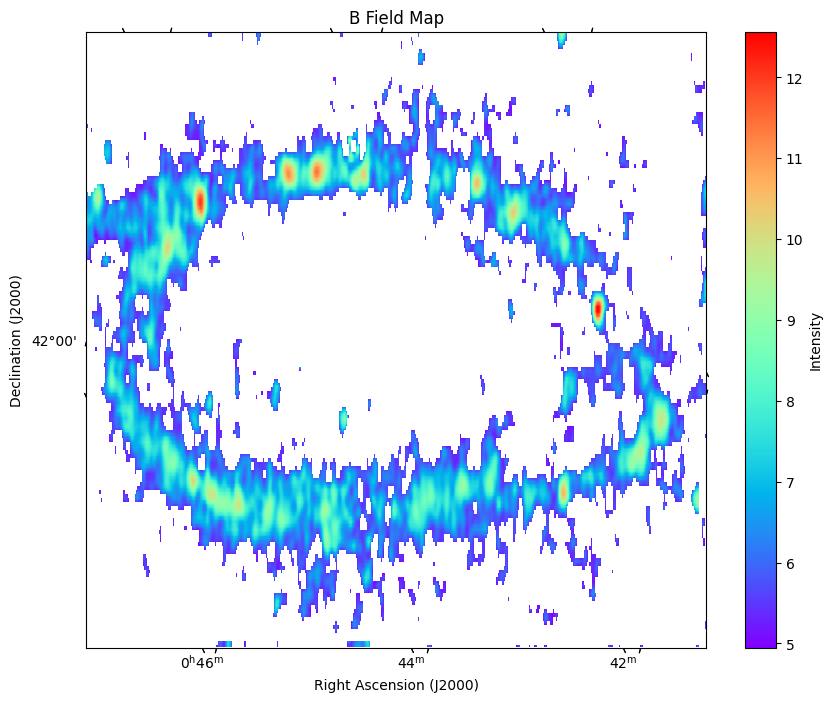

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

# Load the B-field FITS file
B_field = '/content/drive/MyDrive/M31_BvsSFR/M31_B.fits'
hdu_B = fits.open(B_field)
data_B = hdu_B[0].data
header_B = hdu_B[0].header

# Initialize WCS for B-field
wcs_B = WCS(header_B)

# Handle 3D data (e.g., take a slice along the velocity axis)
if data_B.ndim == 3:
    data_B = data_B[0]  # Select the first slice for visualization
    wcs_B = wcs_B.slice([0])  # Slice WCS to match the data slice

# Plot the B-field map with WCS
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection=wcs_B)

im = ax.imshow(data_B, origin='lower', cmap='rainbow', aspect='auto')  # Use a different colormap for variety
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Intensity')

# Set axis labels using WCS
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')

# Add a title
plt.title('B Field Map')

# Show the plot
plt.show()


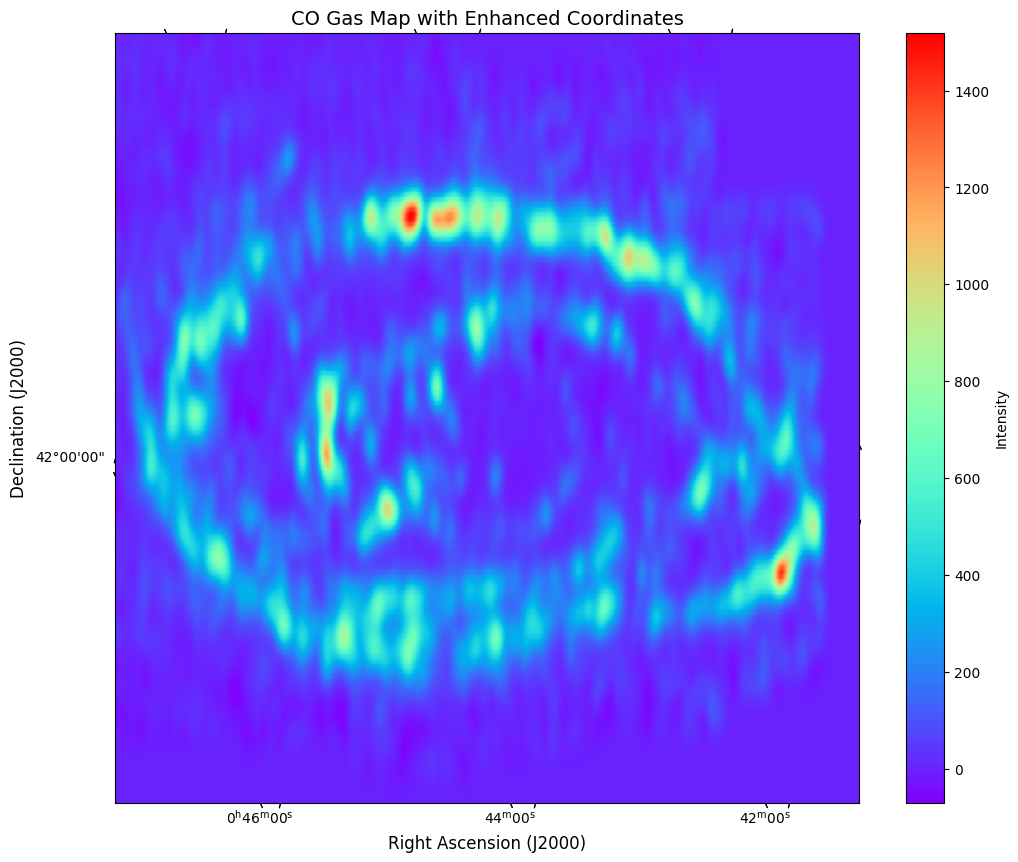

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

# Load the CO FITS file
co_gas = '/content/drive/MyDrive/M31_BvsSFR/m31_co90.fits'
hdu_co = fits.open(co_gas)
data_co = hdu_co[0].data
header_co = hdu_co[0].header

# Initialize WCS for CO map
wcs_co = WCS(header_co)

# Handle 3D data (e.g., take a slice along the velocity axis)
if data_co.ndim == 3:
    data_co = data_co[0]  # Select the first slice for visualization
    wcs_co = wcs_co.slice([0])  # Slice WCS to match the data slice

# Plot the CO map with WCS
fig = plt.figure(figsize=(12, 10))
ax = plt.subplot(111, projection=wcs_co)

im = ax.imshow(data_co, origin='lower', cmap='rainbow', aspect='auto')  # Inferno colormap for contrast
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Intensity')

# Set axis labels using WCS
ax.set_xlabel('Right Ascension (J2000)', fontsize=12)
ax.set_ylabel('Declination (J2000)', fontsize=12)

# Format tick labels for better readability
ax.coords[0].set_major_formatter('hh:mm:ss')  # RA in hours:min:sec
ax.coords[1].set_major_formatter('dd:mm:ss')  # Dec in deg:min:sec

# Set tick label font size
ax.coords[0].set_ticklabel(size=10)
ax.coords[1].set_ticklabel(size=10)

# Add a title
plt.title('CO Gas Map with Enhanced Coordinates', fontsize=14)

# Show the plot
plt.show()


In [ ]:
!pip install reproject


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 60.0 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=1eacb4076275052940994dd36e4c6eb2895fee3fa015481ebee9a2183a5bd756
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree


#B overlayed on CO

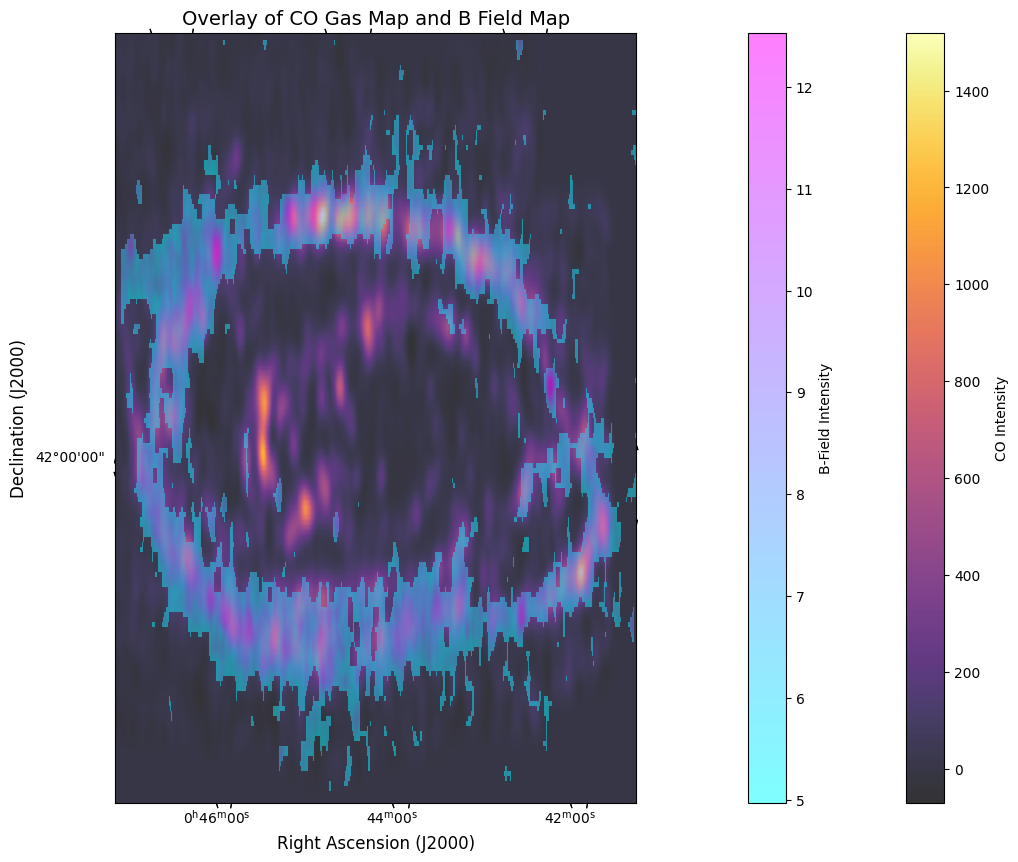

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp

# File paths
co_gas = '/content/drive/MyDrive/M31_BvsSFR/m31_co90.fits'
B_field = '/content/drive/MyDrive/M31_BvsSFR/M31_B.fits'

# Load CO map
hdu_co = fits.open(co_gas)
data_co = hdu_co[0].data
header_co = hdu_co[0].header
wcs_co = WCS(header_co)

# Load B-field map
hdu_B = fits.open(B_field)
data_B = hdu_B[0].data
header_B = hdu_B[0].header
wcs_B = WCS(header_B)

# Handle 3D data: Use the first slice if data is 3D
if data_co.ndim == 3:
    data_co = data_co[0]
    wcs_co = wcs_co.slice([0])

if data_B.ndim == 3:
    data_B = data_B[0]
    wcs_B = wcs_B.slice([0])

# Reproject the B-field map to match the CO map's WCS
data_B_reprojected, _ = reproject_interp((data_B, wcs_B), wcs_co, shape_out=data_co.shape)

# Plot the overlay
fig = plt.figure(figsize=(12, 10))
ax = plt.subplot(111, projection=wcs_co)

# Plot CO map as base layer
im1 = ax.imshow(data_co, origin='lower', cmap='inferno', aspect='auto', alpha=0.8)
cbar1 = plt.colorbar(im1, ax=ax, orientation='vertical', pad=0.05)
cbar1.set_label('CO Intensity')

# Overlay B-field map
im2 = ax.imshow(data_B_reprojected, origin='lower', cmap='cool', aspect='auto', alpha=0.5)
cbar2 = plt.colorbar(im2, ax=ax, orientation='vertical', pad=0.15)
cbar2.set_label('B-Field Intensity')

# Set axis labels using WCS
ax.set_xlabel('Right Ascension (J2000)', fontsize=12)
ax.set_ylabel('Declination (J2000)', fontsize=12)

# Format tick labels
ax.coords[0].set_major_formatter('hh:mm:ss')
ax.coords[1].set_major_formatter('dd:mm:ss')

# Set tick label font size
ax.coords[0].set_ticklabel(size=10)
ax.coords[1].set_ticklabel(size=10)

# Add a title
plt.title('Overlay of CO Gas Map and B Field Map', fontsize=14)

# Show the plot
plt.show()


#B vs CO map

Pearson correlation coefficient: 0.592


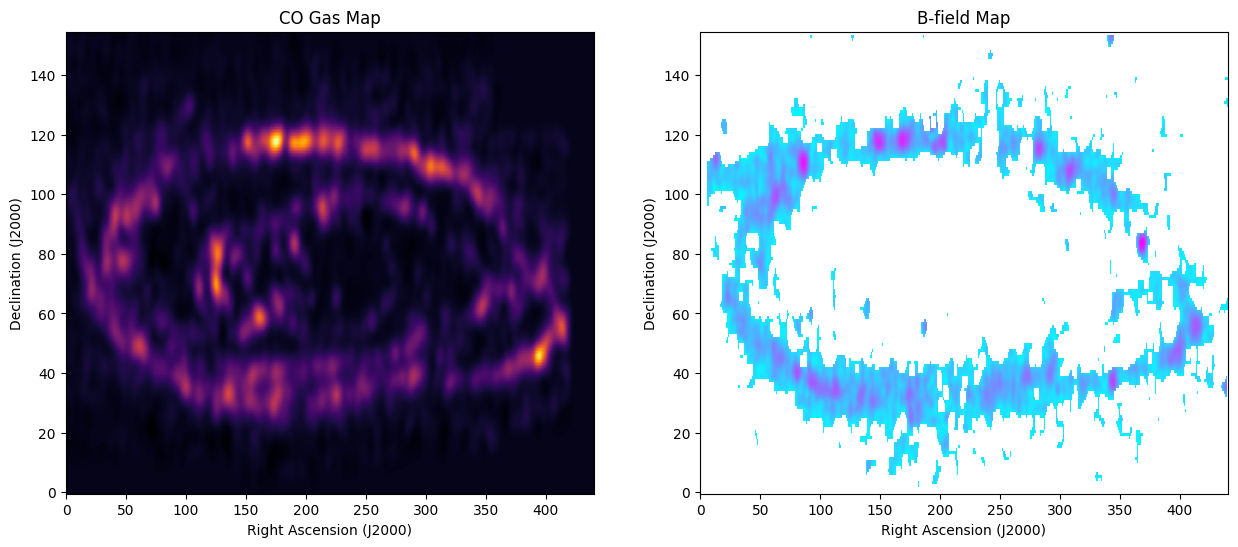

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp
from scipy.stats import pearsonr

# File paths
co_gas = '/content/drive/MyDrive/M31_BvsSFR/m31_co90.fits'
B_field = '/content/drive/MyDrive/M31_BvsSFR/M31_B.fits'

# Load CO map
hdu_co = fits.open(co_gas)
data_co = hdu_co[0].data
header_co = hdu_co[0].header
wcs_co = WCS(header_co)

# Load B-field map
hdu_B = fits.open(B_field)
data_B = hdu_B[0].data
header_B = hdu_B[0].header
wcs_B = WCS(header_B)

# Handle 3D data: Use the first slice if data is 3D
if data_co.ndim == 3:
    data_co = data_co[0]
    wcs_co = wcs_co.slice([0])

if data_B.ndim == 3:
    data_B = data_B[0]
    wcs_B = wcs_B.slice([0])

# Reproject the B-field map to match the CO map's WCS
data_B_reprojected, _ = reproject_interp((data_B, wcs_B), wcs_co, shape_out=data_co.shape)

# Mask invalid data (e.g., NaN or zeros)
mask_co = np.isnan(data_co) | (data_co == 0)
mask_B = np.isnan(data_B_reprojected) | (data_B_reprojected == 0)

# Apply the mask to both datasets
masked_co = data_co[~(mask_co | mask_B)]
masked_B = data_B_reprojected[~(mask_co | mask_B)]

# Compute Pearson correlation between CO and B-field data
correlation, _ = pearsonr(masked_co, masked_B)

# Print correlation value
print(f'Pearson correlation coefficient: {correlation:.3f}')

# Plot CO and B-field maps to visually compare
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot CO map
ax1.imshow(data_co, origin='lower', cmap='inferno', aspect='auto')
ax1.set_title('CO Gas Map')
ax1.set_xlabel('Right Ascension (J2000)')
ax1.set_ylabel('Declination (J2000)')

# Plot B-field map
ax2.imshow(data_B_reprojected, origin='lower', cmap='cool', aspect='auto')
ax2.set_title('B-field Map')
ax2.set_xlabel('Right Ascension (J2000)')
ax2.set_ylabel('Declination (J2000)')

plt.show()


In [ ]:
pip install reproject

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 48.1 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=2bae199e6b9274257378b6befc5e5556a529b03a61e5d8524d85c6f61d64e804
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree


#Mask CO MAP

In [ ]:
from astropy.wcs import WCS
from astropy.wcs.utils import add_stokes_axis_to_wcs
from astropy.io import fits
import numpy as np

# --------------------------------------
# ------   Program main: parameters
# --------------------------------------

# -------------------
# -- Path to the data
# -------------------
file1 = '/content/drive/MyDrive/M31_BvsSFR/m31_co90.fits'  # Input file
new_file_path = '/content/drive/MyDrive/M31_BvsSFR/m31_co_masked.fits'  # Output file

# ----------------------------------------------
# -- Reads the FITS file and prepares arrays
# ----------------------------------------------
with fits.open(file1) as hdul:
    da = hdul[0].data  # Get the data from the FITS file
    header = hdul[0].header  # Get the header

# Print the original data shape and header info
print(f"Original data shape: {da.shape}")

# Handle 3D data: squeeze out the singleton dimension (if present)
if len(da.shape) == 3 and da.shape[0] == 1:
    da = da[0]  # Remove the first singleton dimension
    print(f"Squeezed data shape: {da.shape}")
elif len(da.shape) == 2:
    print(f"Data already in 2D shape: {da.shape}")
else:
    raise ValueError("Unexpected data shape. Expected 2D or 3D with a singleton first dimension.")

# Reverse axes to match the real image orientation
da = da.T  # Transpose the array to switch axes
print(f"Transposed data shape: {da.shape}")

# Update the WCS object for 2D data
wcs = WCS(header, naxis=2)  # Explicitly define a 2D WCS

# Check WCS info
print(wcs)

# Get dimensions of the input FITS file
naxis1, naxis2 = da.shape  # Dimensions after transpose

# Create the output array
newfile = np.zeros((naxis1, naxis2), dtype=da.dtype)

# Parameters (to be set by the user)
x_c = 220  # X center pixel (adjust based on naxis1)
y_c = 75  # Y center pixel (adjust based on naxis2)
inclination = 75  # Inclination in degrees
p = 0.05  # Pixel size in arcseconds (or kpc)
radius = 5  # Radius in arcseconds (or kpc)

# Precompute cos(inclination) to save computation time
cos_inclination = np.cos(np.radians(inclination))

# -------------------------------------------------
# Loop over each pixel and apply the transformation
for j in range(naxis2):  # Loop over rows (y-axis)
    for i in range(naxis1):  # Loop over columns (x-axis)
        # Calculate the radius from the center
        r = np.sqrt(
            (i - x_c) ** 2.0 +  # X-coordinate distance
            (1.0 / cos_inclination * (j - y_c)) ** 2.0  # Y-coordinate distance
        ) * p

        sa = da[i, j]  # Access data using (x, y) indexing

        # Subtract the inner radius area
        if r <= radius:
            x = 0.0
        else:
            x = sa

        newfile[i, j] = x  # Store processed data

# Write the new data to a FITS file
fits.writeto(new_file_path, newfile, header, overwrite=True)
print(f"New FITS file saved at {new_file_path}")


Original data shape: (1, 155, 441)
Squeezed data shape: (155, 441)
Transposed data shape: (441, 155)
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---ARC' 'DEC--ARC' 
CRVAL : 10.69155121 41.26990128 
CRPIX : 226.0 77.0 
NAXIS : 441  155  1
New FITS file saved at /content/drive/MyDrive/M31_BvsSFR/m31_co_masked.fits


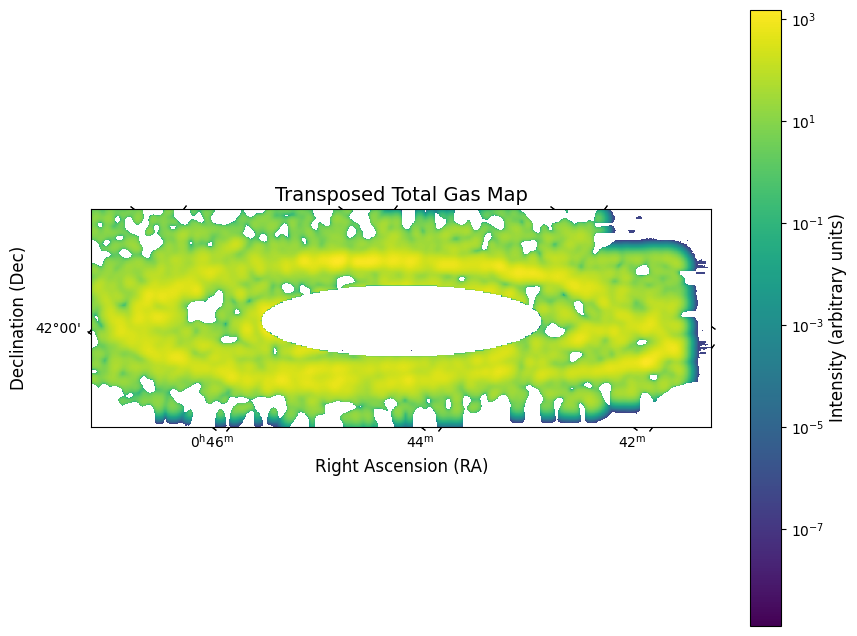

In [ ]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.wcs import WCS
import warnings
warnings.simplefilter('ignore')

# File path for the transposed FITS file
transposed_file = '/content/drive/MyDrive/M31_BvsSFR/m31_co_transposed_masked.fits'

# Load the transposed FITS file
with fits.open(transposed_file) as hdul:
    transposed_data = hdul[0].data
    header = hdul[0].header

# Create a WCS object from the header
wcs = WCS(header,naxis=2)

# Check the dimensions of the data
if transposed_data.ndim > 2:
    transposed_data = transposed_data[0]  # Select the first 2D slice if necessary

# Plot the transposed map
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=wcs)

# Display the image with logarithmic normalization
img = ax.imshow(transposed_data, origin='lower', cmap='viridis', norm=LogNorm())

# Add a title and color bar
ax.set_title('Transposed Total Gas Map', fontsize=14)
cbar = plt.colorbar(img, ax=ax)
cbar.set_label('Intensity (arbitrary units)', fontsize=12)

# Label axes with RA and Dec
ax.set_xlabel('Right Ascension (RA)', fontsize=12)
ax.set_ylabel('Declination (Dec)', fontsize=12)

# Show the plot
plt.show()

#B VS CO_MASKED without Sigma

Pearson correlation coefficient: 0.517


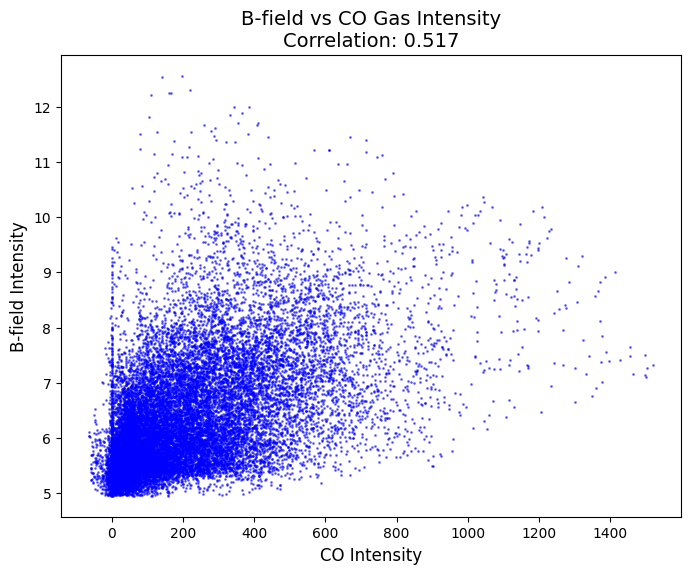

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# File paths
co_gas = '/content/drive/MyDrive/M31_BvsSFR/m31_co_transposed_masked.fits'
B_field = '/content/drive/MyDrive/M31_BvsSFR/M31_B.fits'

# Load CO map
hdu_co = fits.open(co_gas)
data_co = hdu_co[0].data

# Load B-field map
hdu_B = fits.open(B_field)
data_B = hdu_B[0].data

# Handle 3D data: Use the first slice if data is 3D
if data_co.ndim == 3:
    data_co = data_co[0]

if data_B.ndim == 3:
    data_B = data_B[0]

# Ensure both datasets have the same shape
if data_co.shape != data_B.shape:
    raise ValueError("The shapes of the CO and B-field maps do not match!")

# Mask invalid data (NaN or zero values)
mask_co = np.isnan(data_co) | (data_co == 0)
mask_B = np.isnan(data_B) | (data_B <= 4)

# Apply the mask to both datasets
masked_co = data_co[~(mask_co | mask_B)]
masked_B = data_B[~(mask_co | mask_B)]

# Compute the Pearson correlation coefficient
correlation = np.corrcoef(masked_co, masked_B)[0, 1]
print(f"Pearson correlation coefficient: {correlation:.3f}")

# Plot the B vs CO data points
plt.figure(figsize=(8, 6))
plt.scatter(masked_co, masked_B, s=1, color='blue', alpha=0.5)

# Labels and title
plt.xlabel('CO Intensity', fontsize=12)
plt.ylabel('B-field Intensity', fontsize=12)
plt.title(f'B-field vs CO Gas Intensity\nCorrelation: {correlation:.3f}', fontsize=14)

# Display the plot
plt.show()


#B vs CO with $3\sigma$

Pearson correlation coefficient (log-log): 0.420


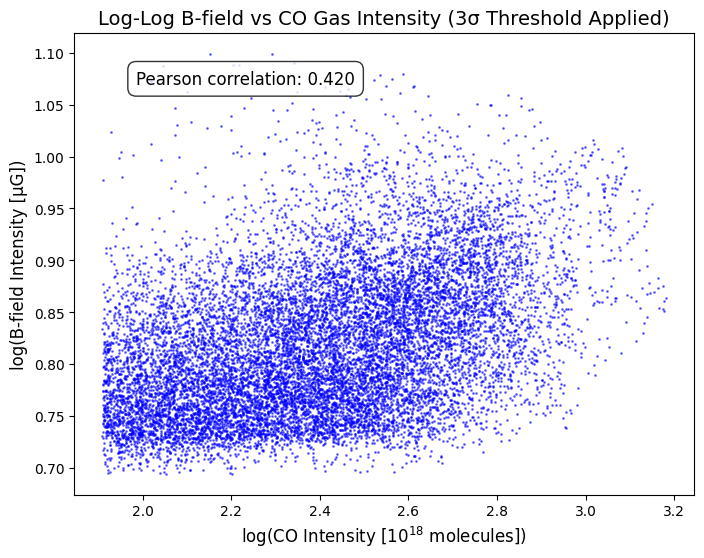

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# File paths
co_gas = '/content/drive/MyDrive/M31_BvsSFR/m31_co_transposed_masked.fits'
B_field = '/content/drive/MyDrive/M31_BvsSFR/M31_B.fits'

# Load CO map
hdu_co = fits.open(co_gas)
data_co = hdu_co[0].data

# Load B-field map
hdu_B = fits.open(B_field)
data_B = hdu_B[0].data

# Handle 3D data: Use the first slice if data is 3D
if data_co.ndim == 3:
    data_co = data_co[0]

if data_B.ndim == 3:
    data_B = data_B[0]

# Ensure both datasets have the same shape
if data_co.shape != data_B.shape:
    raise ValueError("The shapes of the CO and B-field maps do not match!")

# Apply 3-sigma threshold for CO map
sigma = 27  # RMS noise in units of 10^18 molecules
threshold_3sigma = 3 * sigma  # Calculate 3-sigma threshold
mask_co_3sigma = data_co < threshold_3sigma  # Mask pixels below the 3-sigma threshold

# Mask invalid data (NaN or zero values) and apply 3-sigma mask
mask_co = np.isnan(data_co) | (data_co == 0) | mask_co_3sigma
mask_B = np.isnan(data_B) | (data_B <= 4)

# Apply the mask to both datasets
masked_co = data_co[~(mask_co | mask_B)]
masked_B = data_B[~(mask_co | mask_B)]

# Log transformation for both CO and B-field
masked_co_log = np.log10(masked_co[masked_co > 0])  # Log of CO intensity, avoiding zero or negative values
masked_B_log = np.log10(masked_B[masked_B > 0])    # Log of B-field intensity, avoiding zero or negative values

# Compute the Pearson correlation coefficient for log-transformed data
if masked_co_log.size > 0 and masked_B_log.size > 0:
    correlation = np.corrcoef(masked_co_log, masked_B_log)[0, 1]
    print(f"Pearson correlation coefficient (log-log): {correlation:.3f}")
else:
    print("No valid data points available for correlation computation.")

# Plot the log-log scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(masked_co_log, masked_B_log, s=1, color='blue', alpha=0.5)

# Labels and title with units
plt.xlabel('log(CO Intensity [10$^{18}$ molecules])', fontsize=12)
plt.ylabel('log(B-field Intensity [µG])', fontsize=12)  # Adjust the unit as per your data
plt.title('Log-Log B-field vs CO Gas Intensity (3σ Threshold Applied)', fontsize=14)

# Add Pearson correlation coefficient to the plot inside a box
plt.text(0.1, 0.9, f'Pearson correlation: {correlation:.3f}', ha='left', va='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.5'))

# Display the plot
plt.show()




#Total Gas Map

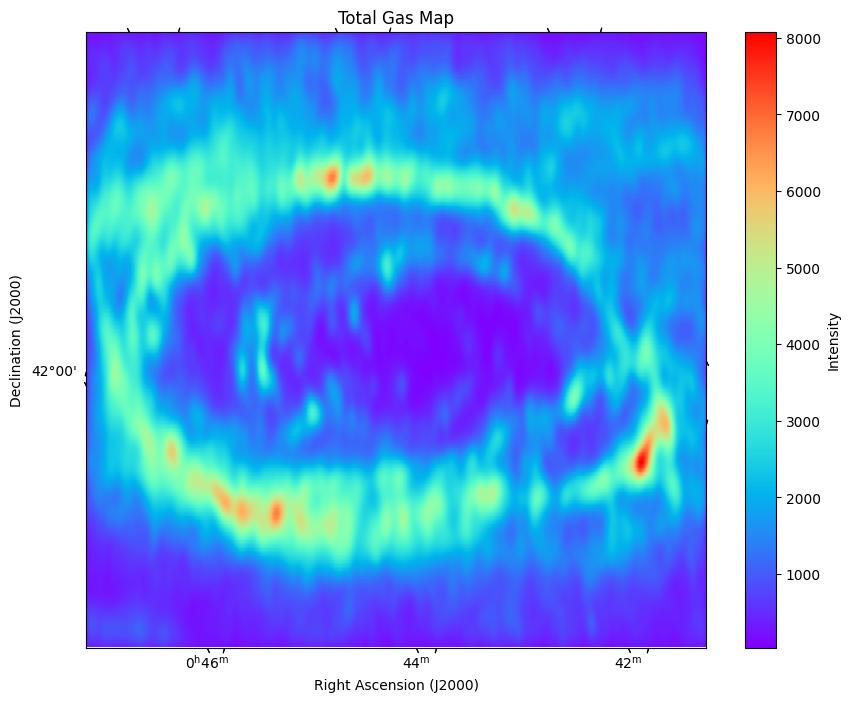

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

# Load the FITS file
co_gas = '/content/drive/MyDrive/M31_BvsSFR/m31_gas90.fits'
hdu_co = fits.open(co_gas)
data_co = hdu_co[0].data
header_co = hdu_co[0].header

# Initialize WCS
wcs_co = WCS(header_co)

# Handle 3D data (e.g., take a slice along the velocity axis)
if data_co.ndim == 3:
    data_co = data_co[0]  # Select the first slice for visualization
    wcs_co = wcs_co.slice([0])  # Slice WCS to match the data slice

# Plot the CO map with WCS
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection=wcs_co)

im = ax.imshow(data_co, origin='lower', cmap='rainbow', aspect='auto')
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.05)
cbar.set_label('Intensity')

# Set axis labels using WCS
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')

# Add a title
plt.title('Total Gas Map')

# Show the plot
plt.show()


#OVerlay total gas on Magnetic field map

In [ ]:
pip install reproject

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.7/210.7 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 76.4 MB/s eta 0:00:00
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5034 sha256=fe23fb0f6bc0c45d00cbdafc9d6bb7a290bbb34dbbd810c8d6d209b8750a1e37
  Stored in directory: /root/.cache/pip/wheels/7f/4e/be/1171b40f43b918087657ec57cf3b81fa1a2e027d8755baa184
Successfully built asciitree


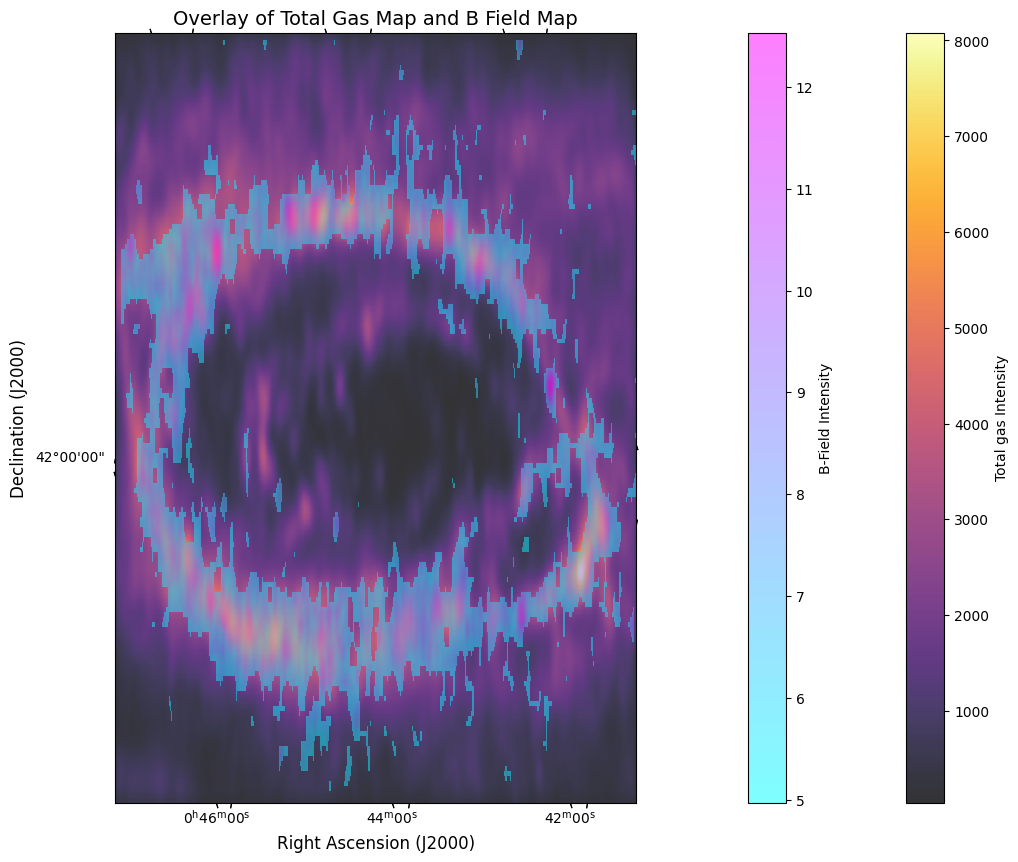

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
from reproject import reproject_interp

# File paths
co_gas = '/content/drive/MyDrive/M31_BvsSFR/m31_gas90.fits'
B_field = '/content/drive/MyDrive/M31_BvsSFR/M31_B.fits'

# Load CO map
hdu_co = fits.open(co_gas)
data_co = hdu_co[0].data
header_co = hdu_co[0].header
wcs_co = WCS(header_co)

# Load B-field map
hdu_B = fits.open(B_field)
data_B = hdu_B[0].data
header_B = hdu_B[0].header
wcs_B = WCS(header_B)

# Handle 3D data: Use the first slice if data is 3D
if data_co.ndim == 3:
    data_co = data_co[0]
    wcs_co = wcs_co.slice([0])

if data_B.ndim == 3:
    data_B = data_B[0]
    wcs_B = wcs_B.slice([0])

# Reproject the B-field map to match the CO map's WCS
data_B_reprojected, _ = reproject_interp((data_B, wcs_B), wcs_co, shape_out=data_co.shape)

# Plot the overlay
fig = plt.figure(figsize=(12, 10))
ax = plt.subplot(111, projection=wcs_co)

# Plot CO map as base layer
im1 = ax.imshow(data_co, origin='lower', cmap='inferno', aspect='auto', alpha=0.8)
cbar1 = plt.colorbar(im1, ax=ax, orientation='vertical', pad=0.05)
cbar1.set_label( 'Total gas Intensity')

# Overlay B-field map
im2 = ax.imshow(data_B_reprojected, origin='lower', cmap='cool', aspect='auto', alpha=0.5)
cbar2 = plt.colorbar(im2, ax=ax, orientation='vertical', pad=0.15)
cbar2.set_label('B-Field Intensity')

# Set axis labels using WCS
ax.set_xlabel('Right Ascension (J2000)', fontsize=12)
ax.set_ylabel('Declination (J2000)', fontsize=12)

# Format tick labels
ax.coords[0].set_major_formatter('hh:mm:ss')
ax.coords[1].set_major_formatter('dd:mm:ss')

# Set tick label font size
ax.coords[0].set_ticklabel(size=10)
ax.coords[1].set_ticklabel(size=10)

# Add a title
plt.title('Overlay of Total Gas Map and B Field Map', fontsize=14)

# Show the plot
plt.show()


#Total Gas Mask

In [ ]:
from astropy.wcs import WCS
from astropy.wcs.utils import add_stokes_axis_to_wcs
from astropy.io import fits
import numpy as np

# --------------------------------------
# ------   Program main: parameters
# --------------------------------------

# -------------------
# -- Path to the data
# -------------------
file1 = '/content/drive/MyDrive/M31_BvsSFR/m31_gas90.fits'  # Input file
new_file_path = '/content/drive/MyDrive/M31_BvsSFR/m31_total_gas_masked.fits'  # Output file

# ----------------------------------------------
# -- Reads the FITS file and prepares arrays
# ----------------------------------------------
with fits.open(file1) as hdul:
    da = hdul[0].data  # Get the data from the FITS file
    header = hdul[0].header  # Get the header

# Print the original data shape and header info
print(f"Original data shape: {da.shape}")

# Handle 3D data: squeeze out the singleton dimension (if present)
if len(da.shape) == 3 and da.shape[0] == 1:
    da = da[0]  # Remove the first singleton dimension
    print(f"Squeezed data shape: {da.shape}")
elif len(da.shape) == 2:
    print(f"Data already in 2D shape: {da.shape}")
else:
    raise ValueError("Unexpected data shape. Expected 2D or 3D with a singleton first dimension.")

# Reverse axes to match the real image orientation
da = da.T  # Transpose the array to switch axes
print(f"Transposed data shape: {da.shape}")

# Update the WCS object for 2D data
wcs = WCS(header, naxis=2)  # Explicitly define a 2D WCS

# Check WCS info
print(wcs)

# Get dimensions of the input FITS file
naxis1, naxis2 = da.shape  # Dimensions after transpose

# Create the output array
newfile = np.zeros((naxis1, naxis2), dtype=da.dtype)

# Parameters (to be set by the user)
x_c = 220  # X center pixel (adjust based on naxis1)
y_c = 75  # Y center pixel (adjust based on naxis2)
inclination = 75  # Inclination in degrees
p = 0.05  # Pixel size in arcseconds (or kpc)
radius = 5  # Radius in arcseconds (or kpc)

# Precompute cos(inclination) to save computation time
cos_inclination = np.cos(np.radians(inclination))

# -------------------------------------------------
# Loop over each pixel and apply the transformation
for j in range(naxis2):  # Loop over rows (y-axis)
    for i in range(naxis1):  # Loop over columns (x-axis)
        # Calculate the radius from the center
        r = np.sqrt(
            (i - x_c) ** 2.0 +  # X-coordinate distance
            (1.0 / cos_inclination * (j - y_c)) ** 2.0  # Y-coordinate distance
        ) * p

        sa = da[i, j]  # Access data using (x, y) indexing

        # Subtract the inner radius area
        if r <= radius:
            x = 0.0
        else:
            x = sa

        newfile[i, j] = x  # Store processed data

# Write the new data to a FITS file
fits.writeto(new_file_path, newfile, header, overwrite=True)
print(f"New FITS file saved at {new_file_path}")

Original data shape: (1, 155, 441)
Squeezed data shape: (155, 441)
Transposed data shape: (441, 155)
WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---ARC' 'DEC--ARC' 
CRVAL : 10.69155121 41.26990128 
CRPIX : 226.0 77.0 
NAXIS : 441  155  1
New FITS file saved at /content/drive/MyDrive/M31_BvsSFR/m31_total_gas_masked.fits


#Transposed Total Gas

In [ ]:
from astropy.io import fits
import numpy as np

# File paths
input_file = '/content/drive/MyDrive/M31_BvsSFR/m31_total_gas_masked.fits'
output_file = '/content/drive/MyDrive/M31_BvsSFR/m31_total_gas_transposed.fits'

# Load the processed FITS file
with fits.open(input_file) as hdul:
    data = hdul[0].data
    header = hdul[0].header

# Print current shape
print(f"Original shape: {data.shape}")

# Transpose the data
transposed_data = data.T
print(f"Transposed shape: {transposed_data.shape}")

# Update header for new dimensions
header['NAXIS1'] = transposed_data.shape[1]  # Update X-axis size
header['NAXIS2'] = transposed_data.shape[0]  # Update Y-axis size

# Save the transposed data into a new FITS file
fits.writeto(output_file, transposed_data, header, overwrite=True)
print(f"Transposed FITS file saved at {output_file}")


Original shape: (441, 155)
Transposed shape: (155, 441)
Transposed FITS file saved at /content/drive/MyDrive/M31_BvsSFR/m31_total_gas_transposed.fits


#Total Gas Transposed Map

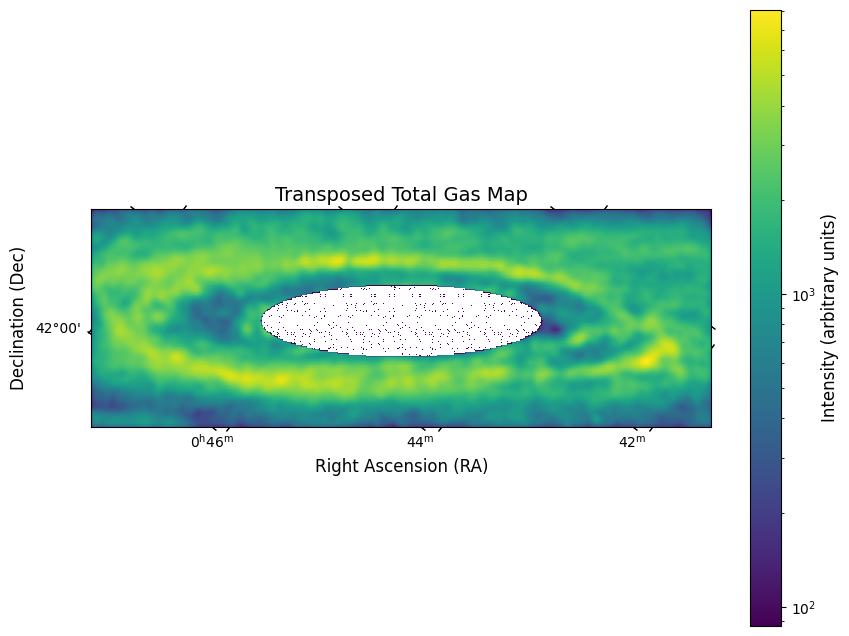

In [ ]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.wcs import WCS
import warnings
warnings.simplefilter('ignore')

# File path for the transposed FITS file
transposed_file = '/content/drive/MyDrive/M31_BvsSFR/m31_total_gas_transposed.fits'

# Load the transposed FITS file
with fits.open(transposed_file) as hdul:
    transposed_data = hdul[0].data
    header = hdul[0].header

# Create a WCS object from the header
wcs = WCS(header,naxis=2)

# Check the dimensions of the data
if transposed_data.ndim > 2:
    transposed_data = transposed_data[0]  # Select the first 2D slice if necessary

# Plot the transposed map
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=wcs)

# Display the image with logarithmic normalization
img = ax.imshow(transposed_data, origin='lower', cmap='viridis', norm=LogNorm())

# Add a title and color bar
ax.set_title('Transposed Total Gas Map', fontsize=14)
cbar = plt.colorbar(img, ax=ax)
cbar.set_label('Intensity (arbitrary units)', fontsize=12)

# Label axes with RA and Dec
ax.set_xlabel('Right Ascension (RA)', fontsize=12)
ax.set_ylabel('Declination (Dec)', fontsize=12)

# Show the plot
plt.show()


#B vs Total Gas

Pearson correlation coefficient (log-log): 0.578


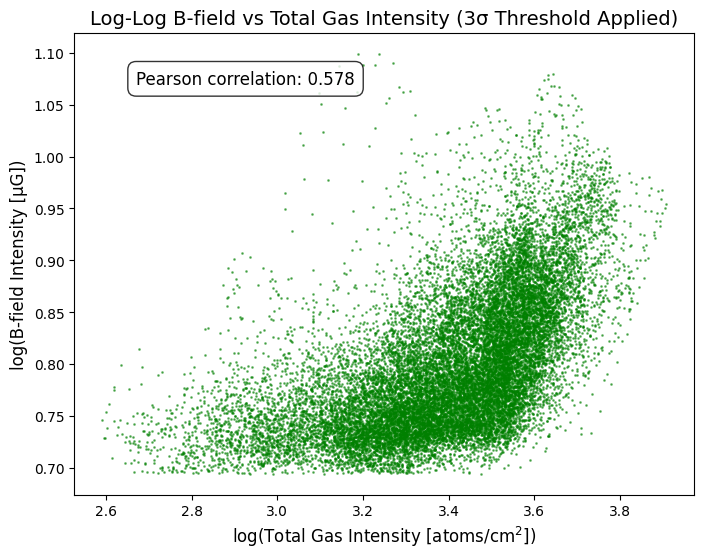

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# File paths
total_gas = '/content/drive/MyDrive/M31_BvsSFR/m31_total_gas_transposed.fits'
B_field = '/content/drive/MyDrive/M31_BvsSFR/M31_B.fits'

# Load total gas map
hdu_gas = fits.open(total_gas)
data_gas = hdu_gas[0].data

# Load B-field map
hdu_B = fits.open(B_field)
data_B = hdu_B[0].data

# Handle 3D data: Use the first slice if data is 3D
if data_gas.ndim == 3:
    data_gas = data_gas[0]

if data_B.ndim == 3:
    data_B = data_B[0]

# Ensure both datasets have the same shape
if data_gas.shape != data_B.shape:
    raise ValueError("The shapes of the total gas and B-field maps do not match!")

# Apply 3-sigma threshold for total gas map
sigma = 130  # RMS noise in atoms/cm^2
threshold_3sigma = 3 * sigma  # Calculate 3-sigma threshold
mask_gas_3sigma = data_gas < threshold_3sigma  # Mask pixels below the 3-sigma threshold

# Mask invalid data (NaN or zero values) and apply 3-sigma mask
mask_gas = np.isnan(data_gas) | (data_gas == 0) | mask_gas_3sigma
mask_B = np.isnan(data_B) | (data_B <= 4)

# Apply the mask to both datasets
masked_gas = data_gas[~(mask_gas | mask_B)]
masked_B = data_B[~(mask_gas | mask_B)]

# Log transformation for both total gas and B-field
masked_gas_log = np.log10(masked_gas[masked_gas > 0])  # Log of total gas intensity, avoiding zero or negative values
masked_B_log = np.log10(masked_B[masked_B > 0])       # Log of B-field intensity, avoiding zero or negative values

# Compute the Pearson correlation coefficient for log-transformed data
if masked_gas_log.size > 0 and masked_B_log.size > 0:
    correlation = np.corrcoef(masked_gas_log, masked_B_log)[0, 1]
    print(f"Pearson correlation coefficient (log-log): {correlation:.3f}")
else:
    print("No valid data points available for correlation computation.")

# Plot the log-log scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(masked_gas_log, masked_B_log, s=1, color='green', alpha=0.5)

# Labels and title with units
plt.xlabel('log(Total Gas Intensity [atoms/cm$^2$])', fontsize=12)
plt.ylabel('log(B-field Intensity [µG])', fontsize=12)  # Adjust the unit as per your data
plt.title('Log-Log B-field vs Total Gas Intensity (3σ Threshold Applied)', fontsize=14)

# Add Pearson correlation coefficient to the plot inside a box
plt.text(0.1, 0.9, f'Pearson correlation: {correlation:.3f}', ha='left', va='center',
         transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black', boxstyle='round,pad=0.5'))

# Display the plot
plt.show()


#SFR Map

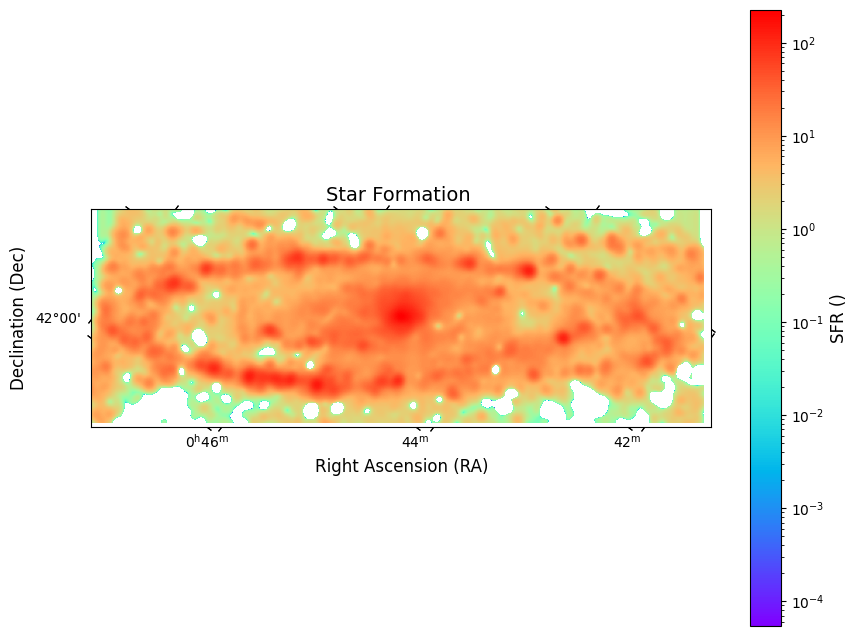

In [ ]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.wcs import WCS
import warnings
warnings.simplefilter('ignore')

hdu_sfr = fits.open('/content/drive/MyDrive/M31_BvsSFR/M31_halpha.fits')
data_sfr = hdu_sfr[0].data
header = hdu_sfr[0].header
# Create a WCS object from the header
wcs = WCS(header,naxis=2)

# Plot the transposed map
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=wcs)

# Display the image with logarithmic normalization
img = ax.imshow(data_sfr, origin='lower', cmap='rainbow', norm=LogNorm())

# Add a title and color bar
ax.set_title('Star Formation ', fontsize=14)
cbar = plt.colorbar(img, ax=ax)
cbar.set_label('SFR ()', fontsize=12)

# Label axes with RA and Dec
ax.set_xlabel('Right Ascension (RA)', fontsize=12)
ax.set_ylabel('Declination (Dec)', fontsize=12)

# Show the plot
plt.show()



#SFR vs CO

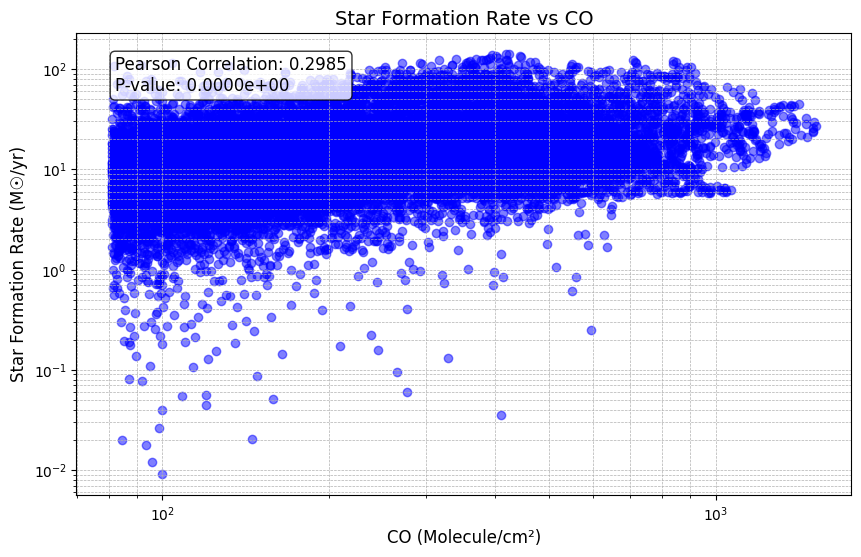

In [ ]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import warnings

# Suppress warnings
warnings.simplefilter('ignore')

# Paths of data
sfr_path = '/content/drive/MyDrive/M31_BvsSFR/M31_halpha.fits'
CO_path = '/content/drive/MyDrive/M31_BvsSFR/m31_co90.fits'

# Load data
hdu_sfr = fits.open(sfr_path)
data_sfr = hdu_sfr[0].data

hdu_CO = fits.open(CO_path)
data_CO = hdu_CO[0].data

# Apply 3-sigma threshold for total gas map
sigma = 27  # RMS noise in atoms/cm^2
threshold_3sigma = 3 * sigma  # Calculate 3-sigma threshold
mask_gas_3sigma = data_CO < threshold_3sigma  # Mask pixels below the 3-sigma threshold

# Mask CO data only, keep SFR data as is
masked_CO = np.ma.masked_array(data_CO, mask=mask_gas_3sigma)

# Flatten the arrays for plotting
sfr_values = data_sfr.flatten()  # Keep all SFR values
co_values = masked_CO.compressed()  # Get non-masked CO values

# Create a scatter plot of SFR vs CO
plt.figure(figsize=(10, 6))
plt.scatter(co_values, sfr_values[~mask_gas_3sigma.flatten()], alpha=0.5, color='blue')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('CO (Molecule/cm²)', fontsize=12)
plt.ylabel('Star Formation Rate (M☉/yr)', fontsize=12)
plt.title('Star Formation Rate vs CO', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Find corresponding indices of non-masked CO and SFR values
valid_indices = np.where(~mask_gas_3sigma.flatten())[0]  # Indices where CO is above the threshold

# Get corresponding SFR values for these indices
sfr_valid_for_corr = sfr_values[valid_indices]

# Ensure both arrays are valid for correlation calculation
# Remove NaNs and infs from both SFR and CO
valid_co_values = co_values[np.isfinite(sfr_valid_for_corr) & np.isfinite(co_values)]
sfr_valid_for_corr = sfr_valid_for_corr[np.isfinite(sfr_valid_for_corr) & np.isfinite(co_values)]

# Calculate Pearson correlation coefficient between valid SFR and CO values
correlation_coefficient, p_value = pearsonr(valid_co_values, sfr_valid_for_corr)

# Display Pearson correlation and p-value in a box
textstr = f"Pearson Correlation: {correlation_coefficient:.4f}\nP-value: {p_value:.4e}"
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

# Show the plot
plt.show()

#SFR vs Total gas

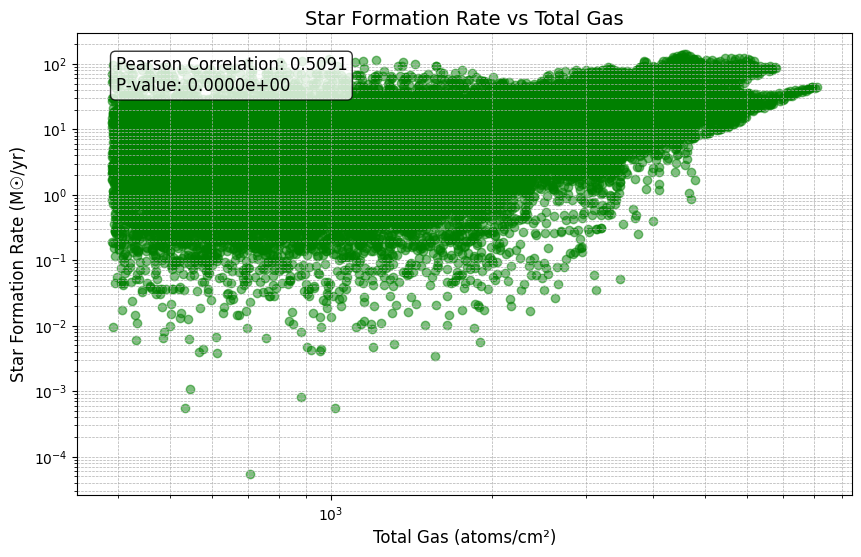

In [ ]:
# prompt: plot sfr vs total gas with rms 130

# Suppress warnings
warnings.simplefilter('ignore')

# Paths of data
sfr_path = '/content/drive/MyDrive/M31_BvsSFR/M31_halpha.fits'
total_gas_path = '/content/drive/MyDrive/M31_BvsSFR/m31_gas90.fits'

# Load data
hdu_sfr = fits.open(sfr_path)
data_sfr = hdu_sfr[0].data

hdu_gas = fits.open(total_gas_path)
data_gas = hdu_gas[0].data

# Apply 3-sigma threshold for total gas map
sigma = 130  # RMS noise in atoms/cm^2
threshold_3sigma = 3 * sigma  # Calculate 3-sigma threshold
mask_gas_3sigma = data_gas < threshold_3sigma  # Mask pixels below the 3-sigma threshold

# Mask total gas data only, keep SFR data as is
masked_gas = np.ma.masked_array(data_gas, mask=mask_gas_3sigma)

# Flatten the arrays for plotting
sfr_values = data_sfr.flatten()  # Keep all SFR values
gas_values = masked_gas.compressed()  # Get non-masked total gas values

# Create a scatter plot of SFR vs total gas
plt.figure(figsize=(10, 6))
plt.scatter(gas_values, sfr_values[~mask_gas_3sigma.flatten()], alpha=0.5, color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Gas (atoms/cm²)', fontsize=12)
plt.ylabel('Star Formation Rate (M☉/yr)', fontsize=12)
plt.title('Star Formation Rate vs Total Gas', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Find corresponding indices of non-masked total gas and SFR values
valid_indices = np.where(~mask_gas_3sigma.flatten())[0]  # Indices where total gas is above the threshold

# Get corresponding SFR values for these indices
sfr_valid_for_corr = sfr_values[valid_indices]

# Ensure both arrays are valid for correlation calculation
# Remove NaNs and infs from both SFR and total gas
valid_gas_values = gas_values[np.isfinite(sfr_valid_for_corr) & np.isfinite(gas_values)]
sfr_valid_for_corr = sfr_valid_for_corr[np.isfinite(sfr_valid_for_corr) & np.isfinite(gas_values)]

# Calculate Pearson correlation coefficient between valid SFR and total gas values
correlation_coefficient, p_value = pearsonr(valid_gas_values, sfr_valid_for_corr)

# Display Pearson correlation and p-value in a box
textstr = f"Pearson Correlation: {correlation_coefficient:.4f}\nP-value: {p_value:.4e}"
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

# Show the plot
plt.show()

#SFR vs Total masked gas

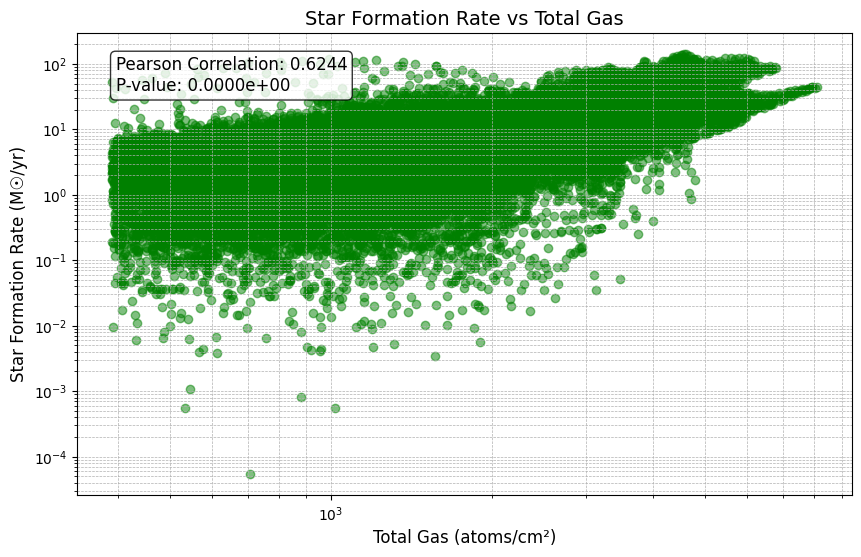

In [ ]:
# prompt: plot sfr vs total gas with rms 130

# Suppress warnings
warnings.simplefilter('ignore')

# Paths of data
sfr_path = '/content/drive/MyDrive/M31_BvsSFR/M31_halpha.fits'
total_gas_path = '/content/drive/MyDrive/M31_BvsSFR/m31_total_gas_transposed.fits'

# Load data
hdu_sfr = fits.open(sfr_path)
data_sfr = hdu_sfr[0].data

hdu_gas = fits.open(total_gas_path)
data_gas = hdu_gas[0].data

# Apply 3-sigma threshold for total gas map
sigma = 130  # RMS noise in atoms/cm^2
threshold_3sigma = 3 * sigma  # Calculate 3-sigma threshold
mask_gas_3sigma = data_gas < threshold_3sigma  # Mask pixels below the 3-sigma threshold

# Mask total gas data only, keep SFR data as is
masked_gas = np.ma.masked_array(data_gas, mask=mask_gas_3sigma)

# Flatten the arrays for plotting
sfr_values = data_sfr.flatten()  # Keep all SFR values
gas_values = masked_gas.compressed()  # Get non-masked total gas values

# Create a scatter plot of SFR vs total gas
plt.figure(figsize=(10, 6))
plt.scatter(gas_values, sfr_values[~mask_gas_3sigma.flatten()], alpha=0.5, color='green')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Total Gas (atoms/cm²)', fontsize=12)
plt.ylabel('Star Formation Rate (M☉/yr)', fontsize=12)
plt.title('Star Formation Rate vs Total Gas', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Find corresponding indices of non-masked total gas and SFR values
valid_indices = np.where(~mask_gas_3sigma.flatten())[0]  # Indices where total gas is above the threshold

# Get corresponding SFR values for these indices
sfr_valid_for_corr = sfr_values[valid_indices]

# Ensure both arrays are valid for correlation calculation
# Remove NaNs and infs from both SFR and total gas
valid_gas_values = gas_values[np.isfinite(sfr_valid_for_corr) & np.isfinite(gas_values)]
sfr_valid_for_corr = sfr_valid_for_corr[np.isfinite(sfr_valid_for_corr) & np.isfinite(gas_values)]

# Calculate Pearson correlation coefficient between valid SFR and total gas values
correlation_coefficient, p_value = pearsonr(valid_gas_values, sfr_valid_for_corr)

# Display Pearson correlation and p-value in a box
textstr = f"Pearson Correlation: {correlation_coefficient:.4f}\nP-value: {p_value:.4e}"
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

# Show the plot
plt.show()

#Critical-Subcritical

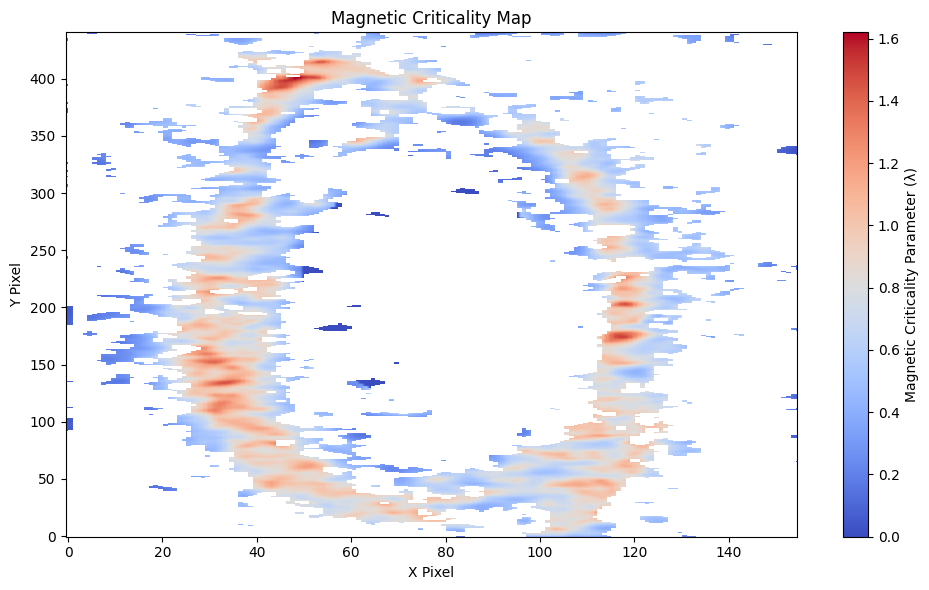

In [ ]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.674e-8  # Gravitational constant in cm^3 g^-1 s^-2

# Paths to FITS files
total_gas_path = '/content/drive/MyDrive/M31_BvsSFR/m31_total_gas_masked.fits'
magnetic_field_path = '/content/drive/MyDrive/M31_BvsSFR/M31_B.fits'

# Load FITS data
with fits.open(total_gas_path) as hdu_gas:
    total_gas_map = hdu_gas[0].data  # Assuming data is in the primary HDU

with fits.open(magnetic_field_path) as hdu_magnetic:
    magnetic_field_map = hdu_magnetic[0].data  # Assuming data is in the primary HDU

# Remove extra dimensions if present
total_gas_map = np.squeeze(total_gas_map).astype(float)  # Ensure numerical data
magnetic_field_map = np.squeeze(magnetic_field_map).astype(float)  # Ensure numerical data

# Transpose one of the arrays to match the shape of the other
# Here, we transpose magnetic_field_map to match total_gas_map
magnetic_field_map = magnetic_field_map.T

# Check shapes and handle mismatch (should be fine now)
if total_gas_map.shape != magnetic_field_map.shape:
    raise ValueError(f"Shape mismatch: total_gas_map {total_gas_map.shape} vs magnetic_field_map {magnetic_field_map.shape}")

# Compute critical surface density (Sigma_B_crit)
denominator = 2 * np.pi * np.sqrt(G)
Sigma_B_crit = magnetic_field_map / denominator

# Ensure no division by zero or invalid values
Sigma_B_crit = np.where(Sigma_B_crit == 0, np.nan, Sigma_B_crit)

# Compute magnetic criticality parameter (lambda)
lambda_map = total_gas_map / Sigma_B_crit

# Classify regions
critical_map = np.where(lambda_map > 1, 'Supercritical', 'Subcritical')

# Visualization
plt.figure(figsize=(10, 6))
plt.imshow(lambda_map, origin='lower', cmap='coolwarm', aspect='auto')
plt.colorbar(label='Magnetic Criticality Parameter (λ)')
plt.title('Magnetic Criticality Map')
plt.xlabel('X Pixel')
plt.ylabel('Y Pixel')
plt.tight_layout()
plt.show()

# Optional: Save classified map
critical_map_output_path = '/content/drive/MyDrive/M31_BvsSFR/critical_map.fits'
hdu = fits.PrimaryHDU(data=lambda_map)
hdu.writeto(critical_map_output_path, overwrite=True)

In [ ]:
!pip install reproject

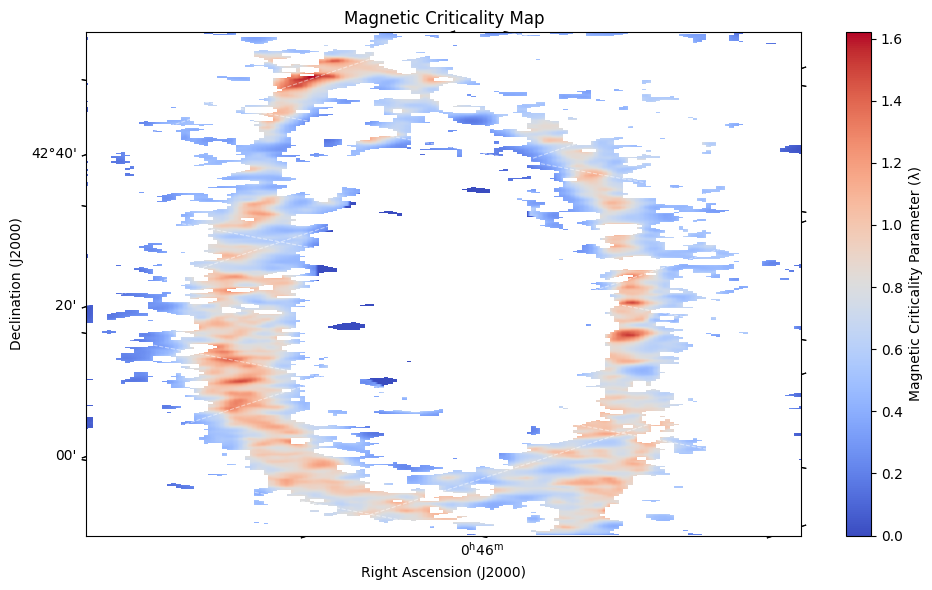

In [ ]:
from astropy.io import fits
from astropy.wcs import WCS
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.674e-8  # Gravitational constant in cm^3 g^-1 s^-2

# Paths to FITS files
total_gas_path = '/content/drive/MyDrive/M31_BvsSFR/m31_total_gas_masked.fits'
magnetic_field_path = '/content/drive/MyDrive/M31_BvsSFR/M31_B.fits'

# Load FITS data
with fits.open(total_gas_path) as hdu_gas:
    total_gas_map = hdu_gas[0].data  # Assuming data is in the primary HDU
    wcs_gas = WCS(hdu_gas[0].header)  # Extract WCS information

with fits.open(magnetic_field_path) as hdu_magnetic:
    magnetic_field_map = hdu_magnetic[0].data  # Assuming data is in the primary HDU

# Remove extra dimensions if present
total_gas_map = np.squeeze(total_gas_map).astype(float)  # Ensure numerical data
magnetic_field_map = np.squeeze(magnetic_field_map).astype(float)  # Ensure numerical data

# Transpose one of the arrays to match the shape of the other
# Here, we transpose magnetic_field_map to match total_gas_map
magnetic_field_map = magnetic_field_map.T

# Check shapes and handle mismatch
if total_gas_map.shape != magnetic_field_map.shape:
    raise ValueError(f"Shape mismatch: total_gas_map {total_gas_map.shape} vs magnetic_field_map {magnetic_field_map.shape}")

# Compute critical surface density (Sigma_B_crit)
denominator = 2 * np.pi * np.sqrt(G)
Sigma_B_crit = magnetic_field_map / denominator

# Ensure no division by zero or invalid values
Sigma_B_crit = np.where(Sigma_B_crit == 0, np.nan, Sigma_B_crit)

# Compute magnetic criticality parameter (lambda)
lambda_map = total_gas_map / Sigma_B_crit

# Select the desired slices for the WCS
# For example, if you have a 3D WCS and want to plot the first slice:
slices = [0]  # Or adjust to your desired slice index
wcs_gas = wcs_gas.slice(slices) #Slice the WCS for plotting

# Visualization with WCS
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection=wcs_gas)  # Use WCS for the plot
im = ax.imshow(lambda_map, origin='lower', cmap='coolwarm', aspect='auto')
cbar = plt.colorbar(im, ax=ax, orientation='vertical', label='Magnetic Criticality Parameter (λ)')

# Add labels and title
ax.set_title('Magnetic Criticality Map')
ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')

# Overlay grid lines
ax.grid(color='white', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()



#$\alpha_{CO}$ Calculate

In [ ]:
import numpy as np
from astropy.io import fits
from astropy.constants import M_sun, pc

# Load FITS files
co_fits = fits.open('/content/drive/MyDrive/M31_BvsSFR/m31_gas90.fits')  # CO data (in K km/s)
hi_fits = fits.open('/content/drive/MyDrive/M31_BvsSFR/m31_HI90.fits')  # HI mass (in solar masses)
mass_fits = fits.open('/content/drive/MyDrive/M31_BvsSFR/m31_gas90.fits')  # Total gas mass (in solar masses)

co_data = co_fits[0].data
hi_mass = hi_fits[0].data
total_gas_mass = mass_fits[0].data
header = co_fits[0].header  # Use CO header for spatial information

# Calculate H2 mass
h2_mass = (total_gas_mass - hi_mass)/2  # H2 mass (in solar masses)

# CO luminosity calculation


d = 730000  # Distance to cloud in parsecs (adjust as needed)

pixel_area_pc2 = 4*np.pi*(d**2) # Pixel area in pc^2

# CO luminosity in each pixel (assuming units of K km/s in the CO map)
# L_CO = (CO intensity) * (area in pc^2)
co_luminosity = co_data * pixel_area_pc2  # In K km/s pc^2

# Calculate alpha_CO as an array
alpha_co = h2_mass / co_luminosity  # In M_sun / (K km/s pc^2)

# Handle the output
# Avoid division by zero or NaN
alpha_co[np.isnan(alpha_co)] = 0  # Replace NaNs with 0
alpha_co[np.isinf(alpha_co)] = 0  # Replace inf with 0

# Save alpha_CO map as a FITS file
fits.writeto('alpha_co.fits', alpha_co, header, overwrite=True)

# Print the mean alpha_CO for reference
mean_alpha_co = np.mean(alpha_co[np.isfinite(alpha_co)])  # Exclude NaN/inf for mean
print(f"Mean Alpha_CO: {mean_alpha_co:.3f} M_sun / (K km/s pc^2)")



Mean Alpha_CO: 0.000 M_sun / (K km/s pc^2)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
alpha_co

array([[[ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          0.0000000e+00,  0.0000000e+00, -5.5829534e-21],
        [ 0.0000000e+00,  0.0000000e+00, -8.3220202e-21, ...,
          0.0000000e+00,  0.0000000e+00, -8.3063005e-21],
        [-1.5600208e-20, -3.2253200e-20, -7.6297925e-20, ...,
          0.0000000e+00, -5.3463405e-21, -6.8173100e-21],
        ...,
        [ 1.1513477e-14,  1.0815422e-14,  9.9374803e-15, ...,
          1.8322220e-20,  2.1823976e-20,  1.9328295e-20],
        [ 1.2818299e-14,  1.1892936e-14,  1.0676242e-14, ...,
          2.0367650e-20,  8.0623412e-21,  1.6079952e-20],
        [ 1.4437521e-14,  1.3272672e-14,  1.1658762e-14, ...,
          2.4954099e-20,  1.9721513e-20,  2.6242996e-20]]], dtype=float32)

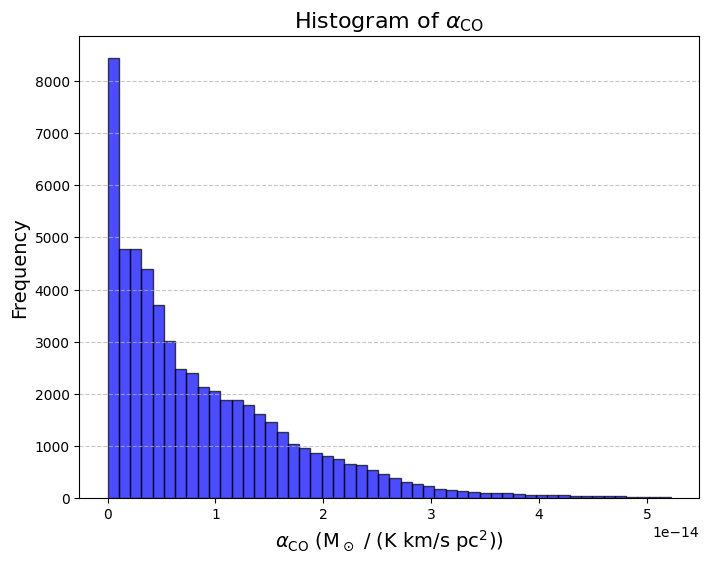

In [ ]:
import matplotlib.pyplot as plt

# Flatten the alpha_co array to 1D for histogram plotting
alpha_co_flat = alpha_co.flatten()

# Remove NaN and invalid values (if not already handled)
alpha_co_flat = alpha_co_flat[np.isfinite(alpha_co_flat)]  # Exclude NaN and Inf
alpha_co_flat = alpha_co_flat[alpha_co_flat > 0]  # Exclude non-positive values

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.hist(alpha_co_flat, bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel(r'$\alpha_{\mathrm{CO}}$ (M$_\odot$ / (K km/s pc$^2$))', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title(r'Histogram of $\alpha_{\mathrm{CO}}$', fontsize=16)  # Fixed title formatting
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
